In [6]:
import nltk                                # Python library for NLP
from nltk.corpus import twitter_samples    # sample Twitter dataset from NLTK
import matplotlib.pyplot as plt      
import random                              # pseudo-random number generator      # library for visualization
import re
import string
import numpy as np
import pandas as pd
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.tokenize import TweetTokenizer
import seaborn as sns
import matplotlib.patheffects as path_effects


In [7]:
nltk.download('twitter_samples')
nltk.download('stopwords')

[nltk_data] Downloading package twitter_samples to
[nltk_data]     C:\Users\omaro\AppData\Roaming\nltk_data...
[nltk_data]   Package twitter_samples is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\omaro\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [8]:
all_positive_tweets = twitter_samples.strings('positive_tweets.json')
all_positive_tweets

['#FollowFriday @France_Inte @PKuchly57 @Milipol_Paris for being top engaged members in my community this week :)',
 '@Lamb2ja Hey James! How odd :/ Please call our Contact Centre on 02392441234 and we will be able to assist you :) Many thanks!',
 '@DespiteOfficial we had a listen last night :) As You Bleed is an amazing track. When are you in Scotland?!',
 '@97sides CONGRATS :)',
 'yeaaaah yippppy!!!  my accnt verified rqst has succeed got a blue tick mark on my fb profile :) in 15 days',
 '@BhaktisBanter @PallaviRuhail This one is irresistible :)\n#FlipkartFashionFriday http://t.co/EbZ0L2VENM',
 "We don't like to keep our lovely customers waiting for long! We hope you enjoy! Happy Friday! - LWWF :) https://t.co/smyYriipxI",
 '@Impatientraider On second thought, there’s just not enough time for a DD :) But new shorts entering system. Sheep must be buying.',
 'Jgh , but we have to go to Bayan :D bye',
 'As an act of mischievousness, am calling the ETL layer of our in-house warehousing 

In [9]:
len(all_positive_tweets)

5000

In [10]:
all_positive_tweets# select the set of positive and negative tweets
all_positive_tweets = twitter_samples.strings('positive_tweets.json')
all_negative_tweets = twitter_samples.strings('negative_tweets.json')
all_positive_tweets

['#FollowFriday @France_Inte @PKuchly57 @Milipol_Paris for being top engaged members in my community this week :)',
 '@Lamb2ja Hey James! How odd :/ Please call our Contact Centre on 02392441234 and we will be able to assist you :) Many thanks!',
 '@DespiteOfficial we had a listen last night :) As You Bleed is an amazing track. When are you in Scotland?!',
 '@97sides CONGRATS :)',
 'yeaaaah yippppy!!!  my accnt verified rqst has succeed got a blue tick mark on my fb profile :) in 15 days',
 '@BhaktisBanter @PallaviRuhail This one is irresistible :)\n#FlipkartFashionFriday http://t.co/EbZ0L2VENM',
 "We don't like to keep our lovely customers waiting for long! We hope you enjoy! Happy Friday! - LWWF :) https://t.co/smyYriipxI",
 '@Impatientraider On second thought, there’s just not enough time for a DD :) But new shorts entering system. Sheep must be buying.',
 'Jgh , but we have to go to Bayan :D bye',
 'As an act of mischievousness, am calling the ETL layer of our in-house warehousing 

In [11]:



print(f"The Length of The Positive Tweets {len(all_positive_tweets)}")
print(f"The Length of The Negative Tweets {len(all_negative_tweets)}")

dict_tweets = {

    "Positive Tweets":all_positive_tweets,
    "Negative tweets":all_negative_tweets,
    "all_tweets" :all_positive_tweets+all_negative_tweets
}

labels = np.append(np.ones((len(all_positive_tweets))), np.zeros((len(all_negative_tweets))))

labels_names = ["Positive" , "Negative"]



The Length of The Positive Tweets 5000
The Length of The Negative Tweets 5000


In [12]:
def label_txt(txt,w = 0.4,h = 0.5,font_size = 40,facecolor = '#bde0fe'):
    fig = plt.figure(figsize=(22, 0.8))
    plt.axis('off')


    t = plt.text(w, h,
                txt,
                fontsize = font_size, 
                weight = 1000, 
                va ='center')
    fig.set_facecolor(facecolor)
    # hatch ='xxxx'
    t.set_path_effects([path_effects.PathPatchEffect(offset =(3, -4),
                                                   
                                                    facecolor ='gray'),
                        path_effects.PathPatchEffect(edgecolor ='white', 
                                                    linewidth = 1.1,
                                                    facecolor ='black')])
    


def word_freq(tweets , rev):
    dict_freq = {}
    for tweet in [ i.split() for i in tweets]:
        for word in tweet:

            if word not in dict_freq:
                dict_freq[word] = 1
                continue

            dict_freq[word] +=1
    dict_freq = {k: v for k, v in sorted(dict_freq.items(), key=lambda item: item[1] , reverse= rev)}
    return dict_freq




from sklearn.base import TransformerMixin, BaseEstimator

class BuildFreqs(BaseEstimator,TransformerMixin):
    def __init__(self):
        self.tweets = None
        self.labels = None
        self.freqs = None
        

    def fit(self,X,y = None):

        self.tweets = X
        self.labels = y

        

    def transform(self,X):


        tweets = X
        ys = self.labels
        

        if type(tweets) == str:

            under_tweets = [under_tweets]

        """Build frequencies.
        Input:
            tweets: a list of tweets
            ys: an m x 1 array with the sentiment label of each tweet
                (either 0 or 1)
        Output:
            freqs: a dictionary mapping each (word, sentiment) pair to its
            frequency
        """
        # Convert np array to list since zip needs an iterable.
        # The squeeze is necessary or the list ends up with one element.
        # Also note that this is just a NOP if ys is already a list.
        yslist = np.squeeze(ys).tolist()

        # Start with an empty dictionary and populate it by looping over all tweets
        # and over all processed words in each tweet.
        freqs = {}
        for y, tweet in zip(yslist, tweets):
            for word in tweet.split(" "):
                pair = (word, y)
                if pair in freqs:
                    freqs[pair] += 1
                else:
                    freqs[pair] = 1


        if self.freqs == None:
            self.freqs = freqs


        return freqs
    


    def fit_transform(self,X,y = None):
        self.fit(X,y)

        return self.transform(X)
        

def freqs_all(freqs):


    list_of_pos_neg_total = []

    of = set([i[0] for i in list(freqs)])


    for tup in of:

        list_of_pos_neg_total.append([tup, freqs.get((tup,1.0),0),freqs.get((tup,0.0),0) , freqs.get((tup,1.0),0)+freqs.get((tup,0.0),0)] )


        

    df_of_pos_neg_total = pd.DataFrame(list_of_pos_neg_total, columns = ["word" , "pos_freq" , "neg_freq" , "total_freq"]).sort_values(by="total_freq" , ascending=False).drop_duplicates()
    return df_of_pos_neg_total






In [13]:

freqs = BuildFreqs().fit_transform(dict_tweets["all_tweets"], labels)

freqs

{('#FollowFriday', 1.0): 25,
 ('@France_Inte', 1.0): 1,
 ('@PKuchly57', 1.0): 1,
 ('@Milipol_Paris', 1.0): 1,
 ('for', 1.0): 747,
 ('being', 1.0): 57,
 ('top', 1.0): 27,
 ('engaged', 1.0): 7,
 ('members', 1.0): 9,
 ('in', 1.0): 477,
 ('my', 1.0): 480,
 ('community', 1.0): 29,
 ('this', 1.0): 239,
 ('week', 1.0): 62,
 (':)', 1.0): 3154,
 ('@Lamb2ja', 1.0): 1,
 ('Hey', 1.0): 41,
 ('James!', 1.0): 2,
 ('How', 1.0): 22,
 ('odd', 1.0): 1,
 (':/', 1.0): 5,
 ('Please', 1.0): 20,
 ('call', 1.0): 24,
 ('our', 1.0): 129,
 ('Contact', 1.0): 2,
 ('Centre', 1.0): 1,
 ('on', 1.0): 307,
 ('02392441234', 1.0): 1,
 ('and', 1.0): 647,
 ('we', 1.0): 141,
 ('will', 1.0): 164,
 ('be', 1.0): 247,
 ('able', 1.0): 8,
 ('to', 1.0): 1054,
 ('assist', 1.0): 1,
 ('you', 1.0): 1204,
 ('Many', 1.0): 13,
 ('thanks!', 1.0): 9,
 ('@DespiteOfficial', 1.0): 1,
 ('had', 1.0): 37,
 ('a', 1.0): 877,
 ('listen', 1.0): 10,
 ('last', 1.0): 33,
 ('night', 1.0): 39,
 ('As', 1.0): 5,
 ('You', 1.0): 92,
 ('Bleed', 1.0): 1,
 ('is'

In [14]:
df_of_pos_neg_total = freqs_all(freqs)
df_of_pos_neg_total

word  pos_freq  neg_freq  total_freq
13772             :(         1      3723        3724
3467              :)      3154         0        3154
18734              I       844      1490        2334
13727             to      1054      1062        2116
12747            the       994       844        1838
...              ...       ...       ...         ...
13437    Philippines         1         0           1
13436  @yoditstanton         0         1           1
13435          prob"         0         1           1
13434        either?         0         1           1
14353         ok???"         1         0           1

[28706 rows x 4 columns]

In [15]:
df = pd.concat([pd.DataFrame([all_positive_tweets]).T,pd.DataFrame([all_negative_tweets]).T])

df["status"] =  np.concatenate([np.ones(len(all_positive_tweets) , dtype=int) , np.zeros(len(all_negative_tweets) , dtype=int)])
df.columns = ["Tweets" , "Sentiment"]
map_label = {
    1:"Positive",
    0:"Negative"

}
df["Sentiment_label"] = df["Sentiment"].apply(lambda a : map_label[a] )
df

Tweets  Sentiment  \
0     #FollowFriday @France_Inte @PKuchly57 @Milipol...          1   
1     @Lamb2ja Hey James! How odd :/ Please call our...          1   
2     @DespiteOfficial we had a listen last night :)...          1   
3                                  @97sides CONGRATS :)          1   
4     yeaaaah yippppy!!!  my accnt verified rqst has...          1   
...                                                 ...        ...   
4995               I wanna change my avi but uSanele :(          0   
4996                         MY PUPPY BROKE HER FOOT :(          0   
4997           where's all the jaebum baby pictures :((          0   
4998  But but Mr Ahmad Maslan cooks too :( https://t...          0   
4999  @eawoman As a Hull supporter I am expecting a ...          0   

     Sentiment_label  
0           Positive  
1           Positive  
2           Positive  
3           Positive  
4           Positive  
...              ...  
4995        Negative  
4996        Negative  
4997        Negative  
4998        Negative  
4999        Negative  

[10000 rows x 3 columns]

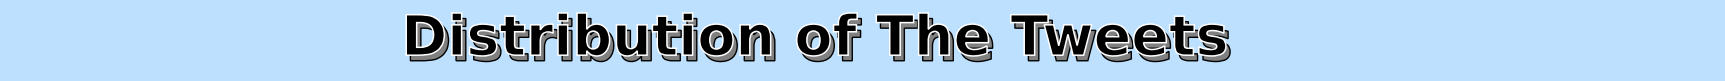

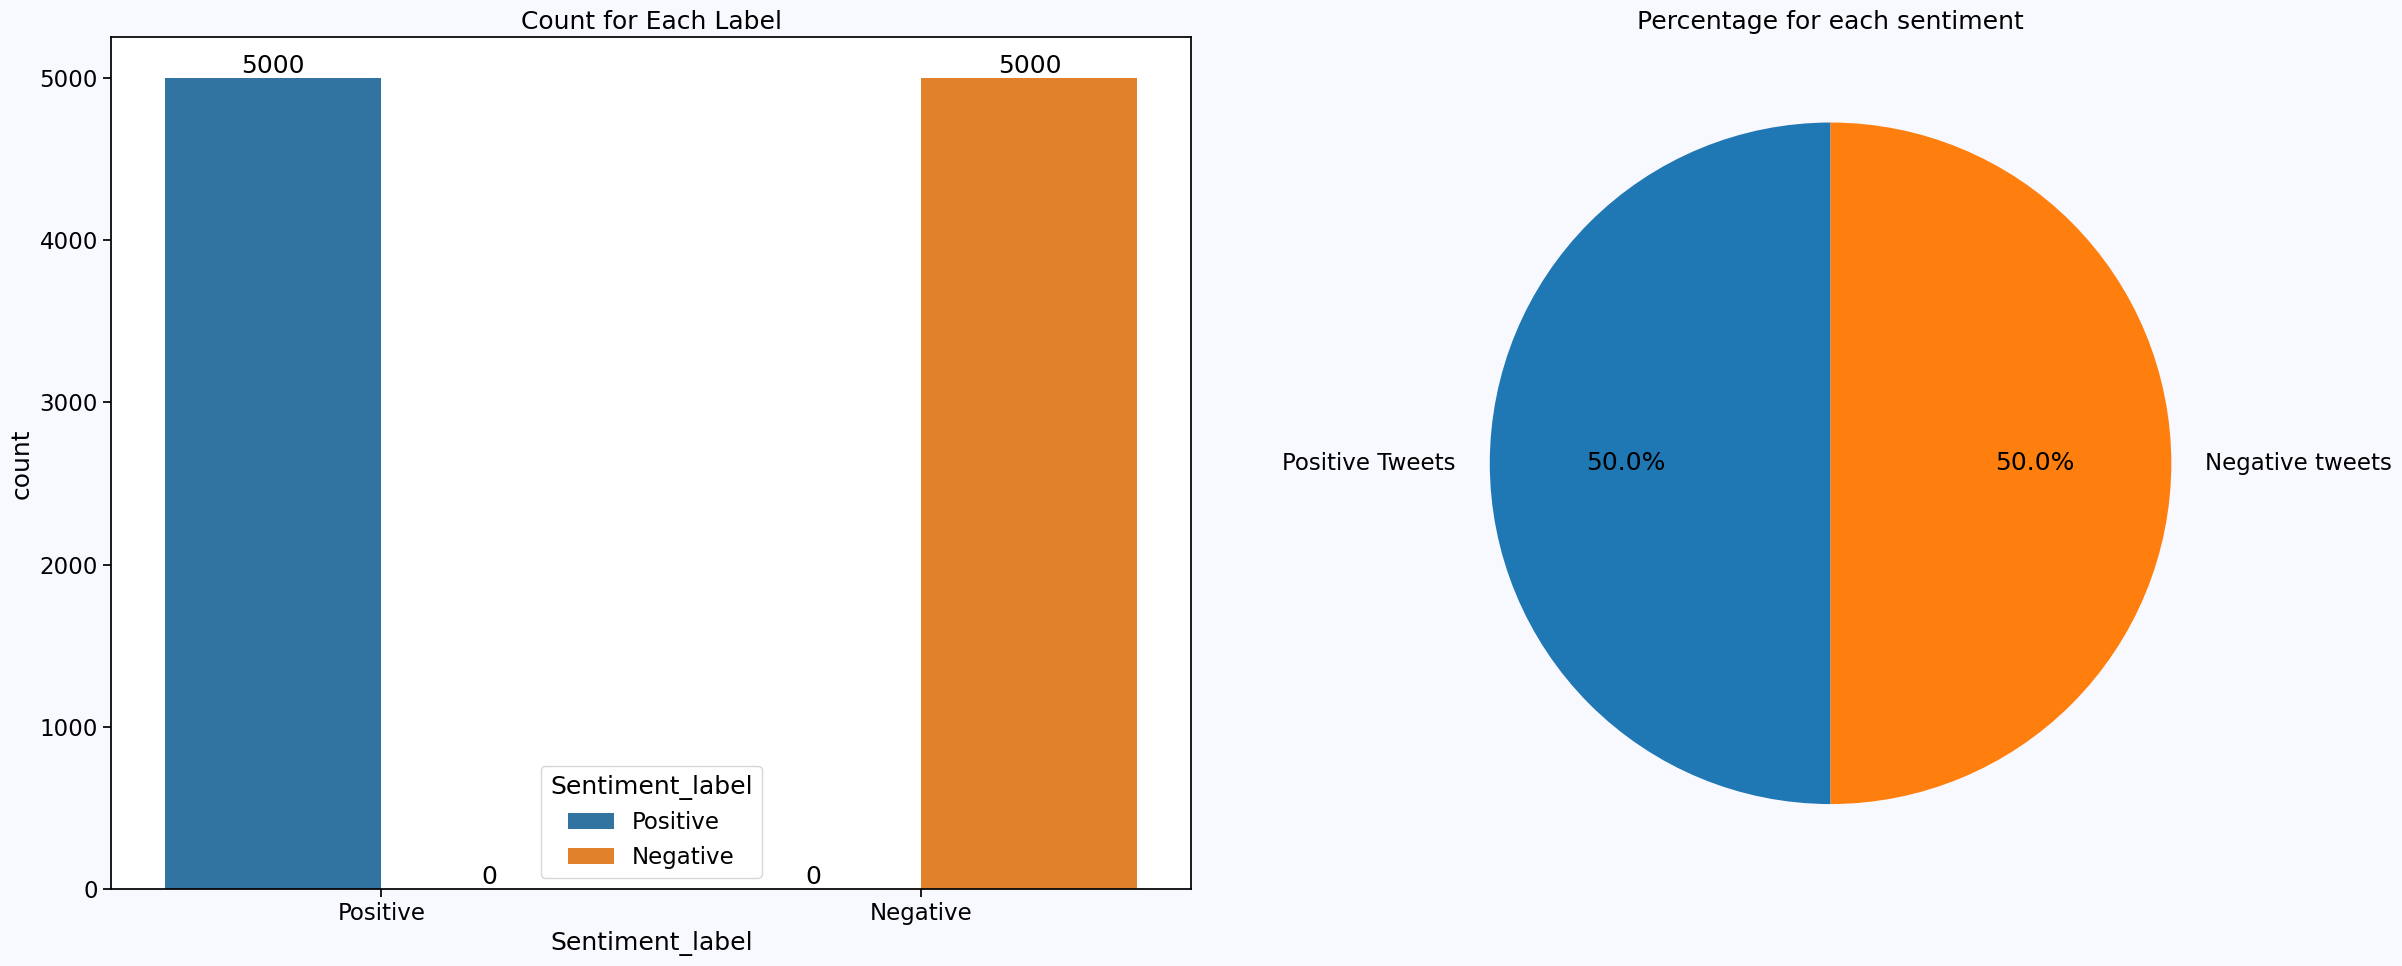

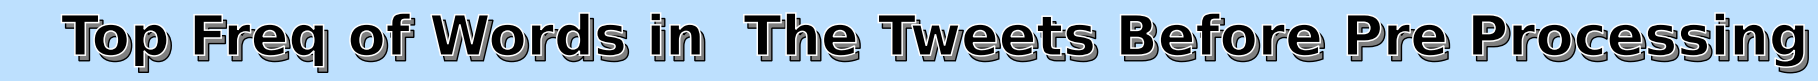

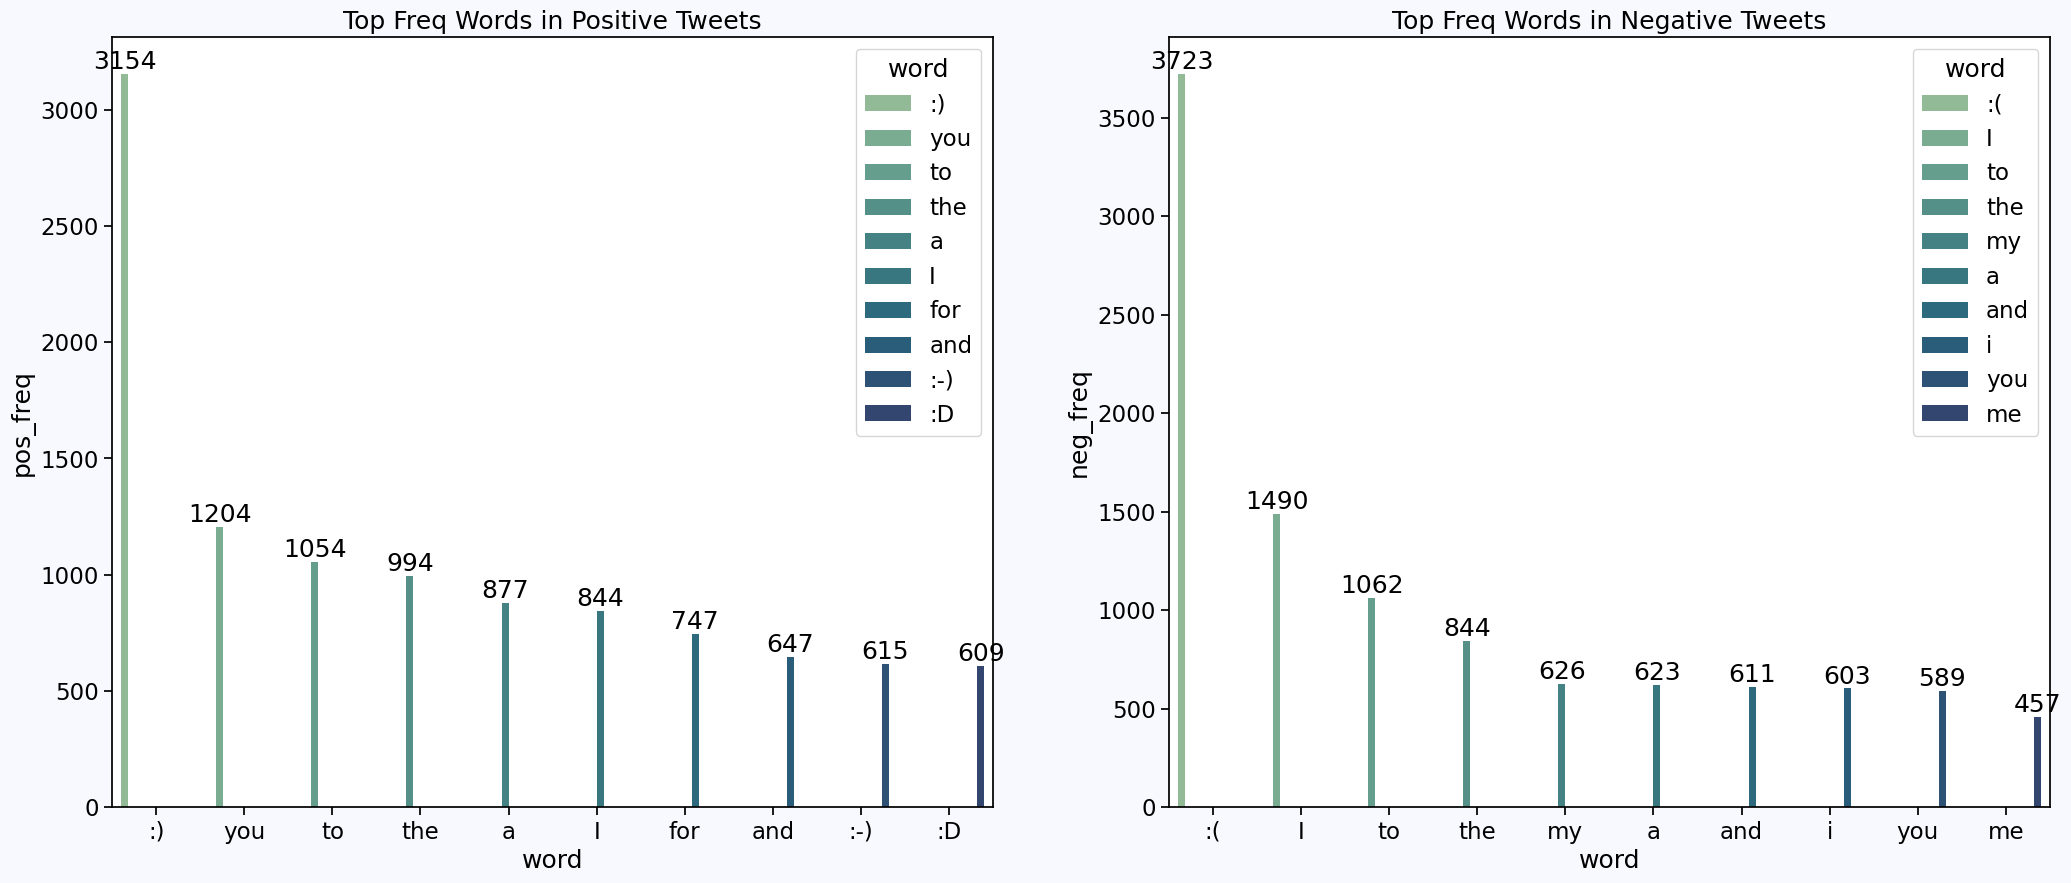

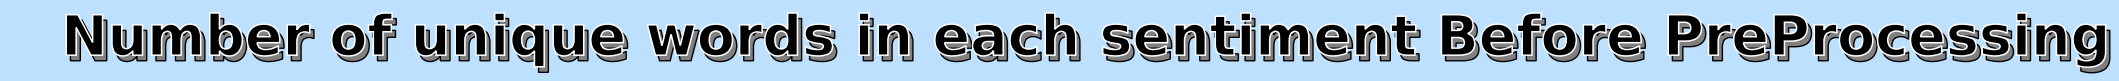

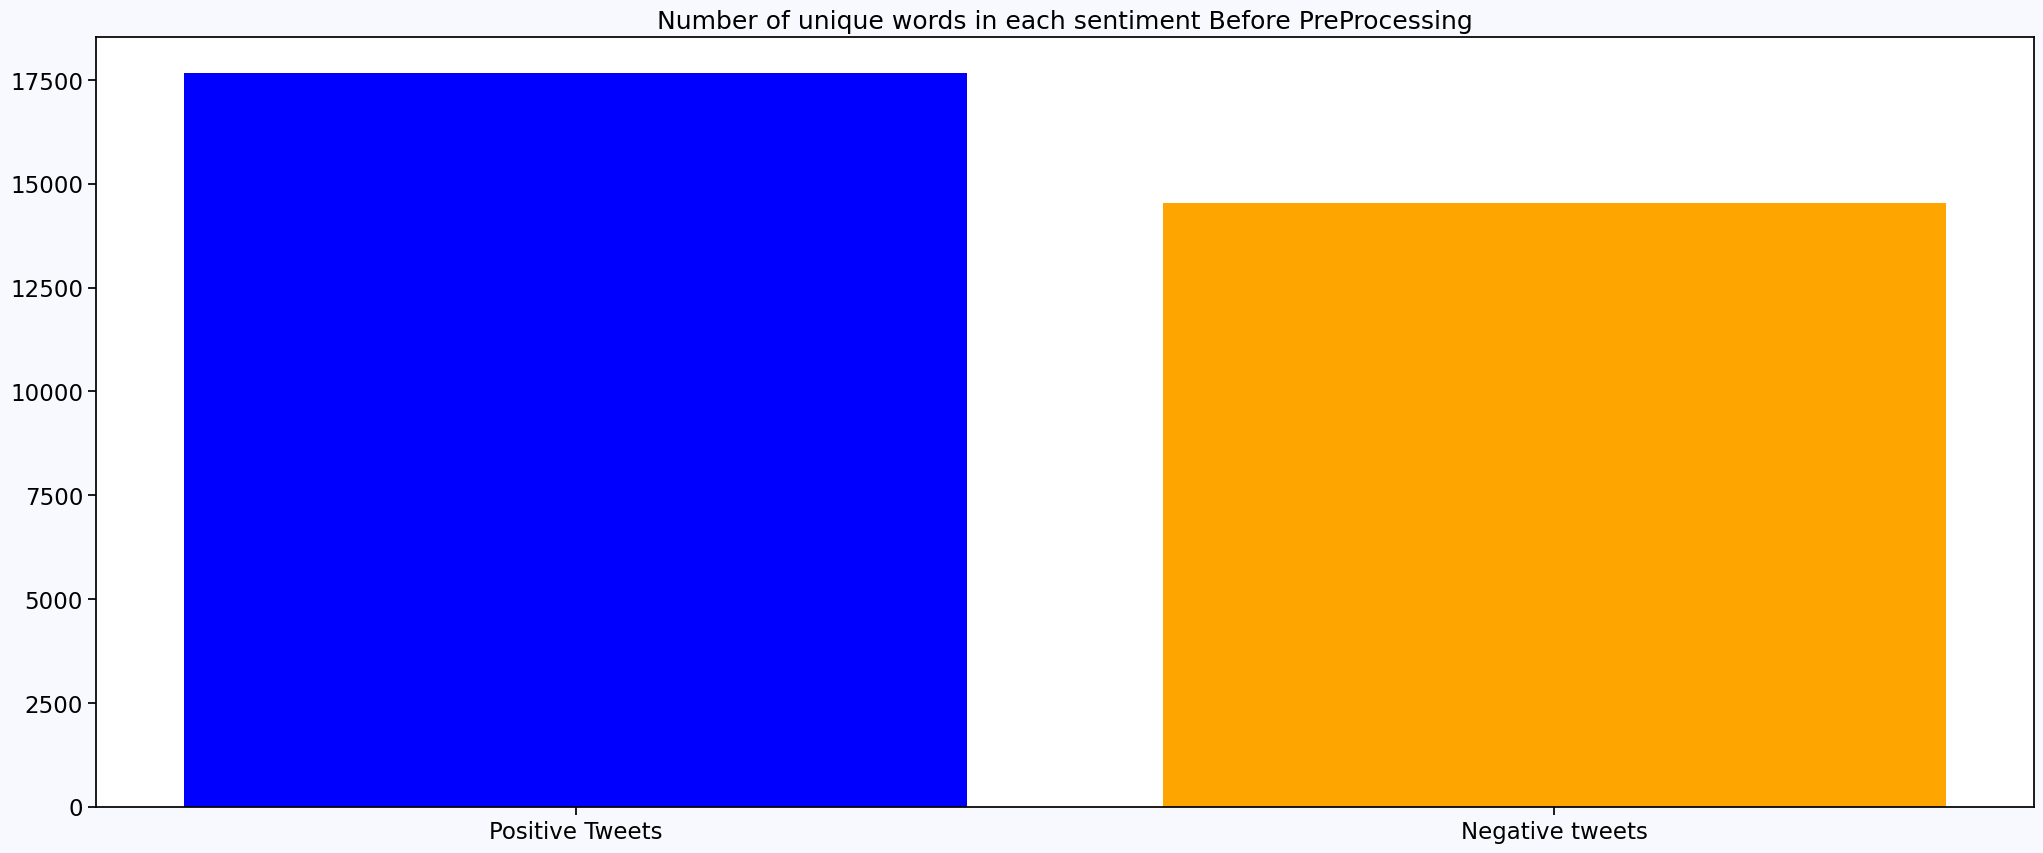

In [16]:
label_txt("       Distribution of The Tweets" , w = 0.15)

sns.set_context('notebook',font_scale= 1.5)
plt.rcParams['figure.facecolor'] = 'ghostwhite'
plt.rcParams['axes.facecolor'] = 'white'
fig, axs = plt.subplots(1,2,figsize = (25,10))



ax = sns.countplot(x = "Sentiment_label" , data = df , hue = "Sentiment_label" ,ax = axs[0])

for i in range(2):
    ax.bar_label(ax.containers[i])

axs[0].set_title("Count for Each Label")

axs[1].pie([len(dict_tweets[cat]) for cat in list(dict_tweets.keys())[:-1]], labels= list(dict_tweets.keys())[:-1], startangle=90 , autopct='%1.1f%%' )
axs[1].set_title("Percentage for each sentiment")

plt.tight_layout()
plt.show()










label_txt("Top Freq of Words in  The Tweets Before Pre Processing" , w = 0.03)


fig, axs = plt.subplots(1,2,figsize = (25,10))


g = sns.barplot(x = "word" , y ="pos_freq" ,palette= "crest", data=df_of_pos_neg_total.sort_values(by = "pos_freq",ascending=False).head(10) , hue = "word" , ax = axs[0])

for i in range(10):
    g.bar_label(g.containers[i])

axs[0].set_title("Top Freq Words in Positive Tweets")





g = sns.barplot(x = "word" , y ="neg_freq" ,palette= "crest", data=df_of_pos_neg_total.sort_values(by = "neg_freq",ascending=False).head(10) , hue = "word" , ax = axs[1])

for i in range(10):
    g.bar_label(g.containers[i])

axs[1].set_title("Top Freq Words in Negative Tweets")


plt.show()











label_txt("Number of unique words in each sentiment Before PreProcessing" ,w = 0.03)
sns.set_context('notebook',font_scale= 1.5)
plt.rcParams['figure.facecolor'] = 'ghostwhite'
plt.rcParams['axes.facecolor'] = 'white'
fig, axs = plt.subplots(figsize = (25,10))

axs.bar(list(dict_tweets.keys())[:-1],[len(df_of_pos_neg_total[df_of_pos_neg_total["pos_freq"] > 0].drop_duplicates()),len(df_of_pos_neg_total[df_of_pos_neg_total["neg_freq"] > 0].drop_duplicates())] , color = ["blue", "orange"])
axs.set_title("Number of unique words in each sentiment Before PreProcessing")
plt.show()






In [17]:
from sklearn.datasets import make_blobs
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt

# Generate some random data for clustering
X, _ = make_blobs(n_samples=300, centers=4, cluster_std=1.0, random_state=42)

# Use Random Forests for clustering
# Here, we set n_estimators=100, which means we'll use 100 decision trees
rf = RandomForestClassifier(n_estimators=100, random_state=42)

# Fit the model
rf.fit(X)

# Get the cluster assignments from the decision trees
cluster_assignments = rf.predict(X)

# Plot the clusters
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=cluster_assignments, cmap='viridis', s=50, alpha=0.5)
plt.title('Random Forest Clustering')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.colorbar(label='Cluster')
plt.show()


TypeError: BaseForest.fit() missing 1 required positional argument: 'y'

In [19]:
arr_of_top_30 = np.array(df_of_pos_neg_total.sort_values(by = "total_freq", ascending=False)[:30])
arr_of_top_30

array([[':(', 1, 3723, 3724],
       [':)', 3154, 0, 3154],
       ['I', 844, 1490, 2334],
       ['to', 1054, 1062, 2116],
       ['the', 994, 844, 1838],
       ['you', 1204, 589, 1793],
       ['a', 877, 623, 1500],
       ['and', 647, 611, 1258],
       ['for', 747, 390, 1137],
       ['my', 480, 626, 1106],
       ['in', 477, 414, 891],
       ['is', 407, 447, 854],
       ['i', 198, 603, 801],
       ['it', 356, 398, 754],
       ['of', 402, 351, 753],
       ['me', 292, 457, 749],
       ['so', 225, 455, 680],
       ['', 439, 222, 661],
       ['have', 340, 304, 644],
       [':-)', 615, 0, 615],
       [':D', 609, 0, 609],
       ['on', 307, 290, 597],
       ['but', 138, 368, 506],
       ['this', 239, 250, 489],
       ['be', 247, 236, 483],
       ['that', 218, 234, 452],
       ["I'm", 159, 288, 447],
       ['your', 318, 127, 445],
       [':-(', 0, 430, 430],
       ['with', 218, 167, 385]], dtype=object)

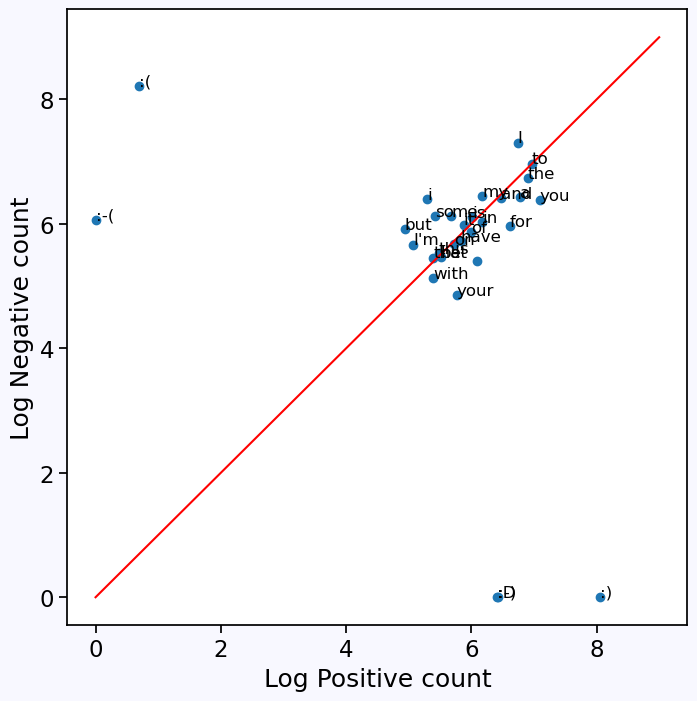

In [20]:
def Visualizing_word_freq(arr_of_top):
    fig, ax = plt.subplots(figsize = (8, 8))

    # convert positive raw counts to logarithmic scale. we add 1 to avoid log(0)
    x = np.log([x[1] + 1 for x in arr_of_top])  

    # do the same for the negative counts
    y = np.log([x[2] + 1 for x in arr_of_top]) 

    # Plot a dot for each pair of words
    ax.scatter(x, y)  

    # assign axis labels
    plt.xlabel("Log Positive count")
    plt.ylabel("Log Negative count")

    # Add the word as the label at the same position as you added the points just before
    for i in range(0, len(arr_of_top)):
        ax.annotate(arr_of_top[i][0], (x[i], y[i]), fontsize=12)

    ax.plot([0, 9], [0, 9], color = 'red') # Plot the red line that divides the 2 areas.
    plt.show()


Visualizing_word_freq(arr_of_top_30)

In [21]:


class ExtractFeatuers(BaseEstimator,TransformerMixin):
    def __init__(self):
        self.tweets = None
        self.freqs = None
        self.extracted_featuers = None

    def fit(self,X,y = None):

        self.tweets = X
        self.freqs = y

    def transform(self,X):
        cleaned_tweets = X

        freqs = self.freqs

        if type(cleaned_tweets) == str:
            cleaned_tweets = [cleaned_tweets]


        '''
        Input: 
            tweet: a list of words for one tweet
            freqs: a dictionary corresponding to the frequencies of each tuple (word, label)
        Output: 
            x: a feature vector of dimension (1,3)
        '''
        # process_tweet tokenizes, stems, and removes stopwords
        list_of_extract_featuers = []


        for single_tweet in cleaned_tweets:
            x = np.zeros((1, 3)) 
            
            #bias term is set to 1
            x[0,0] = 1

            for word in single_tweet.split():

                
                        
                # increment the word count for the positive label 1
                x[0,1] += freqs.get((word, 1.0),0)
                
                # increment the word count for the negative label 0
                x[0,2] += freqs.get((word, 0.0),0)

                

            list_of_extract_featuers.append(x.flatten())

        if self.extracted_featuers == None:
            self.extracted_featuers = list_of_extract_featuers
            
        return list_of_extract_featuers
        

    def fit_transform(self,X,y = None):
        self.fit(X,y)

        return self.transform(X)

In [22]:
X = np.array(ExtractFeatuers().fit_transform(dict_tweets["all_tweets"],freqs))
y = labels

In [23]:
X

array([[1.000e+00, 5.316e+03, 1.767e+03],
       [1.000e+00, 7.198e+03, 3.123e+03],
       [1.000e+00, 6.821e+03, 2.622e+03],
       ...,
       [1.000e+00, 1.186e+03, 1.333e+03],
       [1.000e+00, 2.500e+02, 4.281e+03],
       [1.000e+00, 2.704e+03, 3.287e+03]])

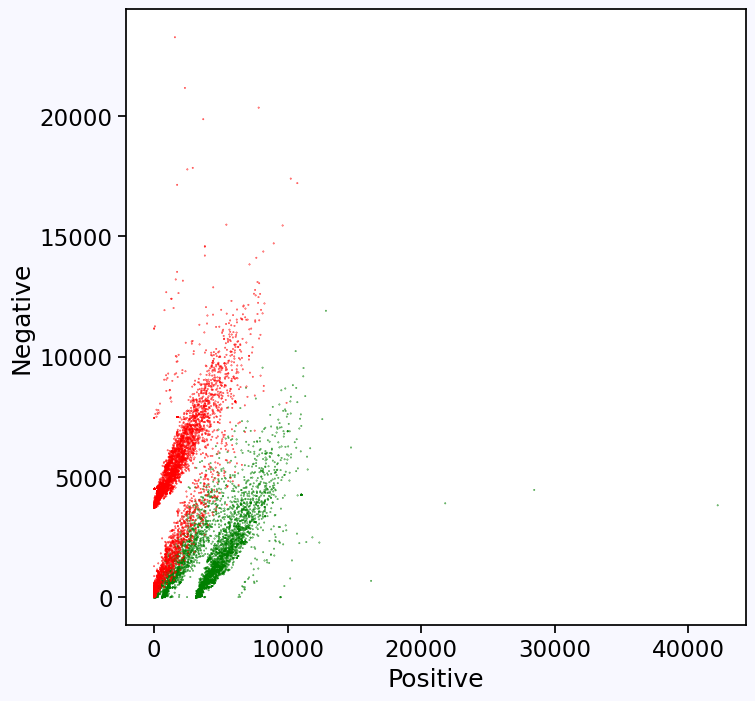

In [24]:

def visualize_tweets_without_theta(X,y):
    # Plot the samples using columns 1 and 2 of the matrix
    fig, ax = plt.subplots(figsize = (8, 8))

    colors = ['red', 'green']

    # Color based on the sentiment Y
    ax.scatter(X[:,1], X[:,2], c=[colors[int(k)] for k in y], s = 0.1)  # Plot a dot for each pair of words
    plt.xlabel("Positive")
    plt.ylabel("Negative")


visualize_tweets_without_theta(X,y)

In [25]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.20, random_state=0 , stratify=y)

In [26]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

LR = LogisticRegression()

LR.fit(X_train,y_train)

y_pred = LR.predict(X_test)

print(f"Accuracy Score is {accuracy_score(y_test,y_pred)}")

Accuracy Score is 0.955


In [27]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(LR,X_train,y_train,cv = 4)
print(f'{i} Scores is  {scores}')
print(f'{i} Avg_Cv Score is  {np.mean(scores)}')

9 Scores is  [0.957  0.9475 0.956  0.9465]
9 Avg_Cv Score is  0.95175


              precision    recall  f1-score   support

         0.0       0.95      0.96      0.96      1000
         1.0       0.96      0.95      0.95      1000

    accuracy                           0.95      2000
   macro avg       0.96      0.95      0.95      2000
weighted avg       0.96      0.95      0.95      2000



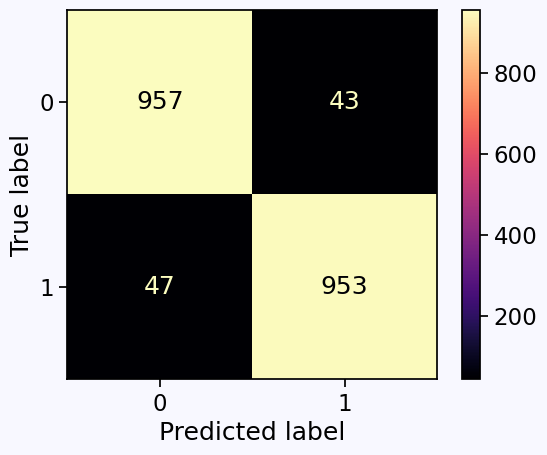

In [28]:
from sklearn.metrics import ConfusionMatrixDisplay,confusion_matrix,classification_report

ConfusionMatrixDisplay(confusion_matrix(y_test,y_pred)).plot(cmap='magma')

print(classification_report(y_test,y_pred))

In [29]:
theta = LR.coef_.flatten()
theta

array([-1.58737172e-06,  3.24300225e-03, -3.05456479e-03])

In [30]:
# Equation for the separation plane
# It give a value in the negative axe as a function of a positive value
# f(pos, neg, W) = w0 + w1 * pos + w2 * neg = 0
# s(pos, W) = (w0 - w1 * pos) / w2
def neg(theta, pos):
    return (-theta[0] - pos * theta[1]) / theta[2]

# Equation for the direction of the sentiments change
# We don't care about the magnitude of the change. We are only interested 
# in the direction. So this direction is just a perpendicular function to the 
# separation plane
# df(pos, W) = pos * w2 / w1
def direction(theta, pos):
    return    pos * theta[2] / theta[1]

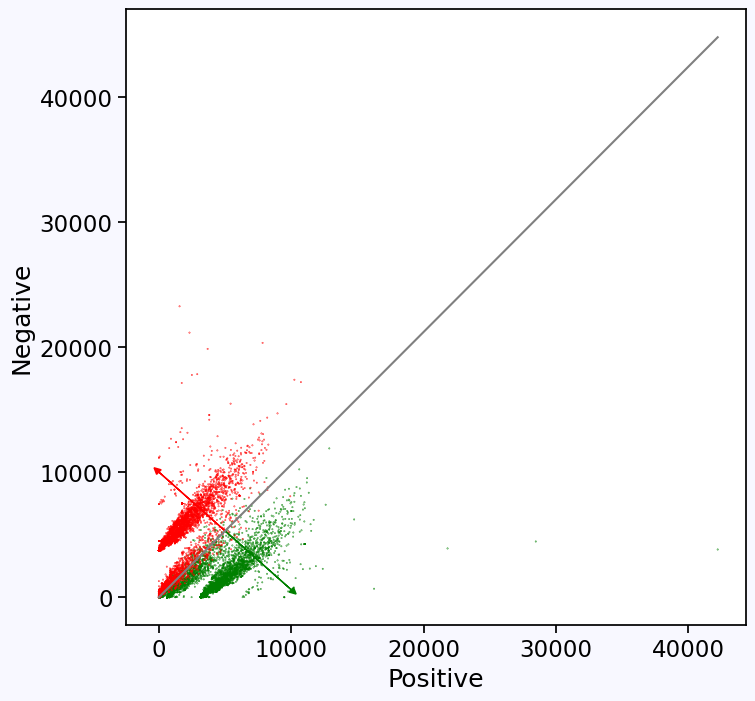

In [31]:

def visualize_tweets_with_theta(X,y,theta):
    # Plot the samples using columns 1 and 2 of the matrix
    fig, ax = plt.subplots(figsize = (8, 8))

    colors = ['red', 'green']

    # Color base on the sentiment Y
    ax.scatter(X[:,1], X[:,2], c=[colors[int(k)] for k in y], s = 0.1)  # Plot a dot for each pair of words
    plt.xlabel("Positive")
    plt.ylabel("Negative")

    # Now lets represent the logistic regression model in this chart. 
    maxpos = np.max(X[:,1])

    offset = 5000 # The pos value for the direction vectors origin

    # Plot a gray line that divides the 2 areas.
    ax.plot([0,  maxpos], [neg(theta, 0),   neg(theta, maxpos)], color = 'gray') 

    # Plot a green line pointing to the positive direction
    ax.arrow(offset, neg(theta, offset), offset, direction(theta, offset), head_width=500, head_length=500, fc='g', ec='g')
    # Plot a red line pointing to the negative direction
    ax.arrow(offset, neg(theta, offset), -offset, -direction(theta, offset), head_width=500, head_length=500, fc='r', ec='r')

    plt.show()


visualize_tweets_with_theta(X,y,theta)

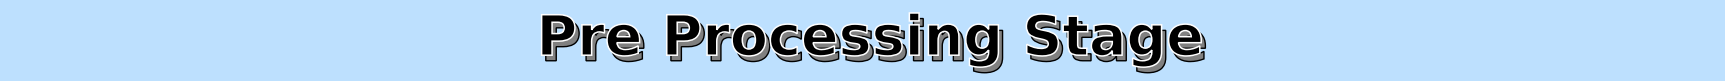

In [32]:
label_txt("              Pre Processing Stage" , w = 0.15)


In [33]:

class ProcessTweets(BaseEstimator,TransformerMixin):

    def __init__(self):
        self.string = string
        self.processed_tweets = None
        self.ready_tweets = None


    def fit(self,X,y = None):
        self.proccesed_tweets = X


    
    def transform(self, X):

        under_tweets = X
        
        if type(under_tweets) == str:

            under_tweets = [under_tweets]




        """Process tweet function.
        Input:
            tweet: a string containing a tweet
        Output:
            tweets_clean: a list of words containing the processed tweet

        """
        stemmer = PorterStemmer()
        stopwords_english = stopwords.words('english')





        sub_tweets = []
        for tweet in under_tweets:
            # remove stock market tickers like $GE
            tweet = re.sub(r'\$\w*', '', tweet)
            # remove old style retweet text "RT"
            tweet = re.sub(r'^RT[\s]+', '', tweet)
            # remove hyperlinks
            tweet = re.sub(r'https?:\/\/.*[\r\n]*', '', tweet)
            # remove hashtags
            # only removing the hash # sign from the word
            tweet = re.sub(r'#', '', tweet)

            sub_tweets.append(tweet)


            

        # tokenize tweets
        tokenizer = TweetTokenizer(preserve_case=False, strip_handles=True,
                                reduce_len=True)
        

        tokenize_tweets = []
        for tweet in sub_tweets:
            tokenize_tweets.append(tokenizer.tokenize(tweet)) 


        clean_tweets = []

        for single_tweet in tokenize_tweets:
            tweet_clean = []
            for word in single_tweet:


                if (word not in stopwords_english and  # remove stopwords
                        word not in string.punctuation):  # remove punctuation
                    
                    # tweets_clean.append(word)
                    stem_word = stemmer.stem(word)  # stemming word
                    tweet_clean.append(stem_word)

            clean_tweets.append(" ".join(tweet_clean))


        if self.ready_tweets == None:
            self.ready_tweets = clean_tweets


        return  clean_tweets
    


    
    def fit_transform(self,X,y=None):
        self.fit(X,y)

        return self.transform(X)



In [34]:
cleaned_tweets_obj = ProcessTweets()

cleaned_tweets = cleaned_tweets_obj.fit_transform(dict_tweets["all_tweets"])
cleaned_tweets

['followfriday top engag member commun week :)',
 'hey jame odd :/ pleas call contact centr 02392441234 abl assist :) mani thank',
 'listen last night :) bleed amaz track scotland',
 'congrat :)',
 'yeaaah yipppi accnt verifi rqst succeed got blue tick mark fb profil :) 15 day',
 'one irresist :) flipkartfashionfriday',
 'like keep love custom wait long hope enjoy happi friday lwwf :)',
 'second thought ’ enough time dd :) new short enter system sheep must buy',
 'jgh go bayan :d bye',
 'act mischiev call etl layer in-hous wareh app katamari well … name impli :p',
 'followfriday top influenc commun week :)',
 'love big ... juici ... selfi :)',
 'follow',
 "perfect alreadi know what' wait :)",
 'great new opportun junior triathlet age 12 13 gatorad seri get entri :)',
 'lay greet card rang print today love job :-)',
 "friend' lunch ... yummm :) nostalgia tb ku",
 "id conflict thank help :d here' screenshot work",
 'hi liv :)',
 'hello need know someth u fm twitter — sure thing :) dm x',

In [68]:
cleaned_freqs_obj = BuildFreqs()

cleaned_freq = cleaned_freqs_obj.fit_transform(cleaned_tweets,labels)
cleaned_freq

{('followfriday', 1.0): 25,
 ('top', 1.0): 32,
 ('engag', 1.0): 7,
 ('member', 1.0): 16,
 ('commun', 1.0): 33,
 ('week', 1.0): 83,
 (':)', 1.0): 3568,
 ('hey', 1.0): 76,
 ('jame', 1.0): 7,
 ('odd', 1.0): 2,
 (':/', 1.0): 5,
 ('pleas', 1.0): 97,
 ('call', 1.0): 37,
 ('contact', 1.0): 7,
 ('centr', 1.0): 2,
 ('02392441234', 1.0): 1,
 ('abl', 1.0): 8,
 ('assist', 1.0): 1,
 ('mani', 1.0): 33,
 ('thank', 1.0): 620,
 ('listen', 1.0): 16,
 ('last', 1.0): 47,
 ('night', 1.0): 68,
 ('bleed', 1.0): 2,
 ('amaz', 1.0): 51,
 ('track', 1.0): 5,
 ('scotland', 1.0): 2,
 ('congrat', 1.0): 21,
 ('yeaaah', 1.0): 1,
 ('yipppi', 1.0): 1,
 ('accnt', 1.0): 2,
 ('verifi', 1.0): 2,
 ('rqst', 1.0): 1,
 ('succeed', 1.0): 1,
 ('got', 1.0): 69,
 ('blue', 1.0): 9,
 ('tick', 1.0): 1,
 ('mark', 1.0): 1,
 ('fb', 1.0): 6,
 ('profil', 1.0): 2,
 ('15', 1.0): 5,
 ('day', 1.0): 246,
 ('one', 1.0): 129,
 ('irresist', 1.0): 2,
 ('flipkartfashionfriday', 1.0): 17,
 ('like', 1.0): 233,
 ('keep', 1.0): 68,
 ('love', 1.0): 400,


In [ ]:
"folowfriday top  jame rg rg"

In [69]:
cleaned_featuers_obj = ExtractFeatuers()

cleaned_featuers = np.array(cleaned_featuers_obj.fit_transform(cleaned_tweets,cleaned_freq))
cleaned_featuers

array([[1.000e+00, 3.764e+03, 7.200e+01],
       [1.000e+00, 4.464e+03, 5.170e+02],
       [1.000e+00, 3.759e+03, 1.600e+02],
       ...,
       [1.000e+00, 3.400e+01, 4.640e+03],
       [1.000e+00, 1.000e+01, 4.585e+03],
       [1.000e+00, 1.160e+02, 5.820e+02]])

In [37]:
df_of_pos_neg_total = freqs_all(cleaned_freq)
df_of_pos_neg_total

word  pos_freq  neg_freq  total_freq
9746               :(         1      4571        4572
5115               :)      3568         2        3570
608             thank       620       107         727
2176              :-)       692         0         692
9266           follow       381       262         643
...               ...       ...       ...         ...
2354          volcano         1         0           1
2355  wonderful.great         1         0           1
5941       tzelumxoxo         0         1           1
5940              ken         0         1           1
1779            refus         1         0           1

[10417 rows x 4 columns]

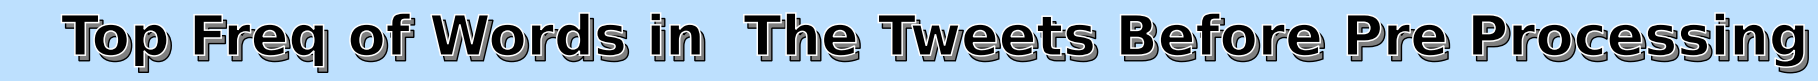

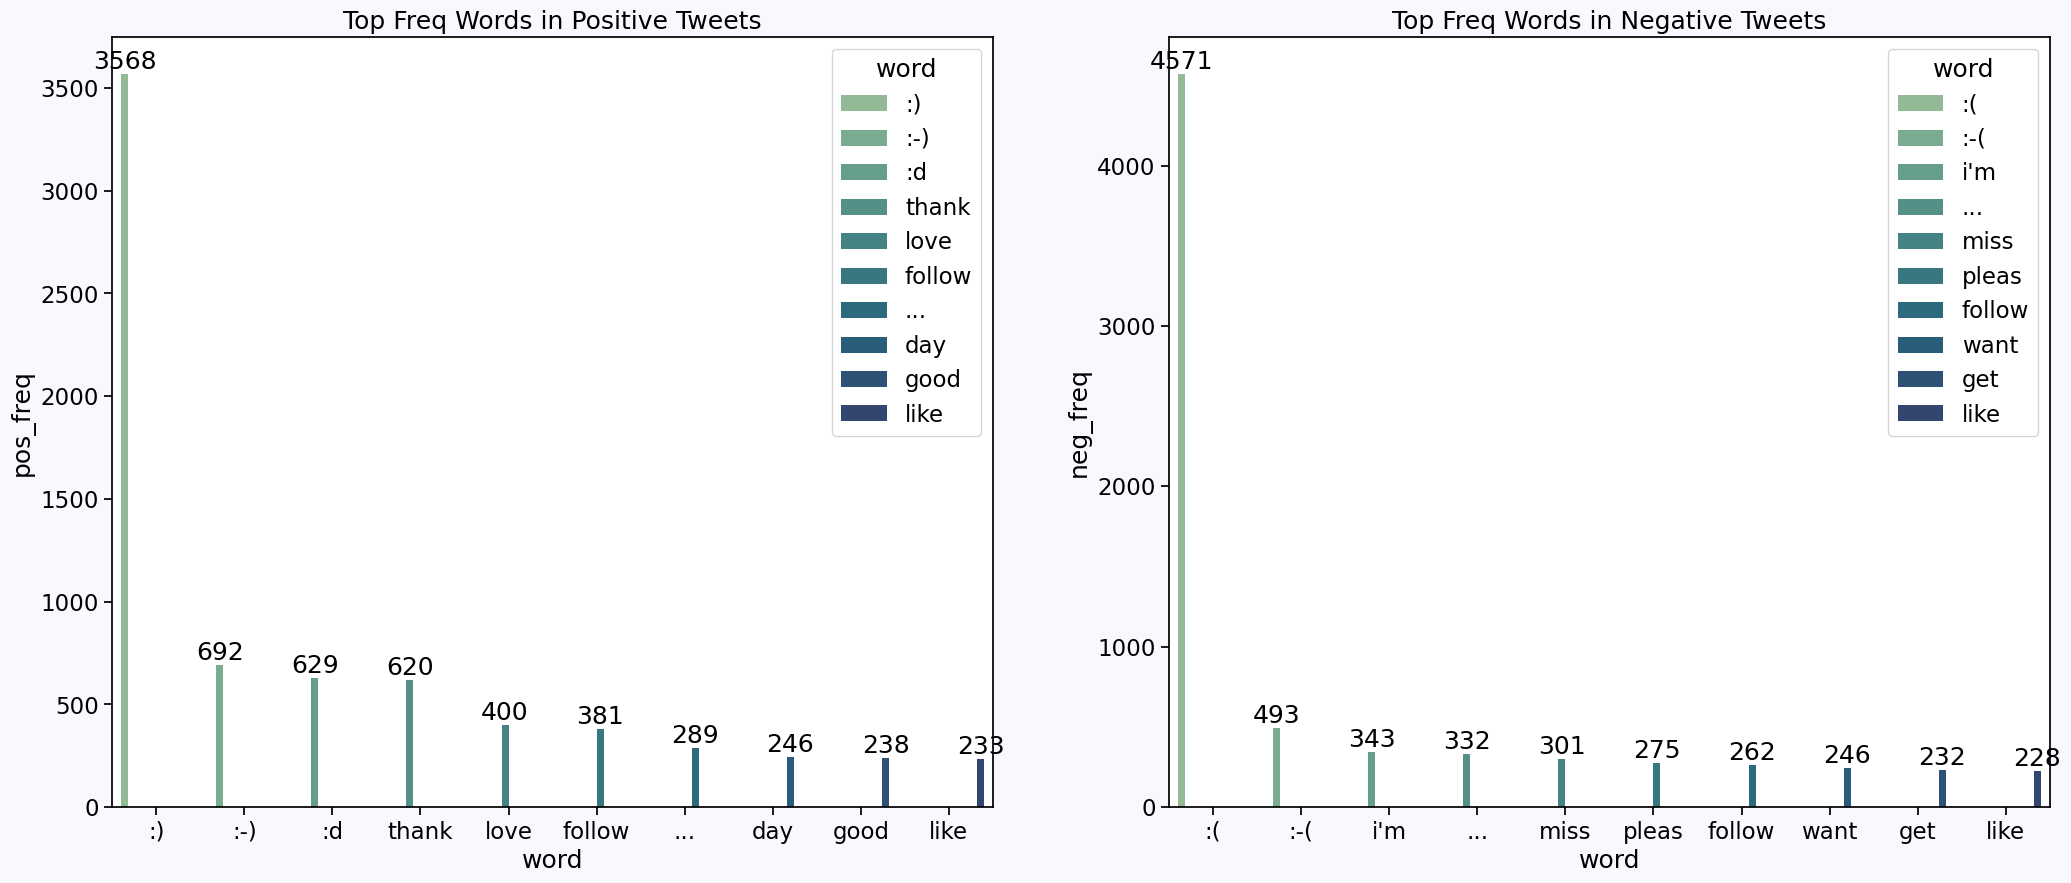

In [38]:

label_txt("Top Freq of Words in  The Tweets Before Pre Processing" , w = 0.03)


fig, axs = plt.subplots(1,2,figsize = (25,10))


g = sns.barplot(x = "word" , y ="pos_freq" ,palette= "crest", data=df_of_pos_neg_total.sort_values(by = "pos_freq",ascending=False).head(10) , hue = "word" , ax = axs[0])

for i in range(10):
    g.bar_label(g.containers[i])

axs[0].set_title("Top Freq Words in Positive Tweets")





g = sns.barplot(x = "word" , y ="neg_freq" ,palette= "crest", data=df_of_pos_neg_total.sort_values(by = "neg_freq",ascending=False).head(10) , hue = "word" , ax = axs[1])

for i in range(10):
    g.bar_label(g.containers[i])

axs[1].set_title("Top Freq Words in Negative Tweets")


plt.show()



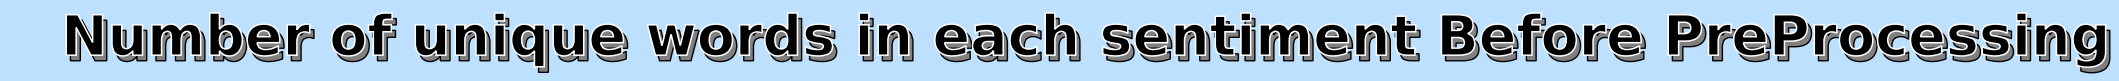

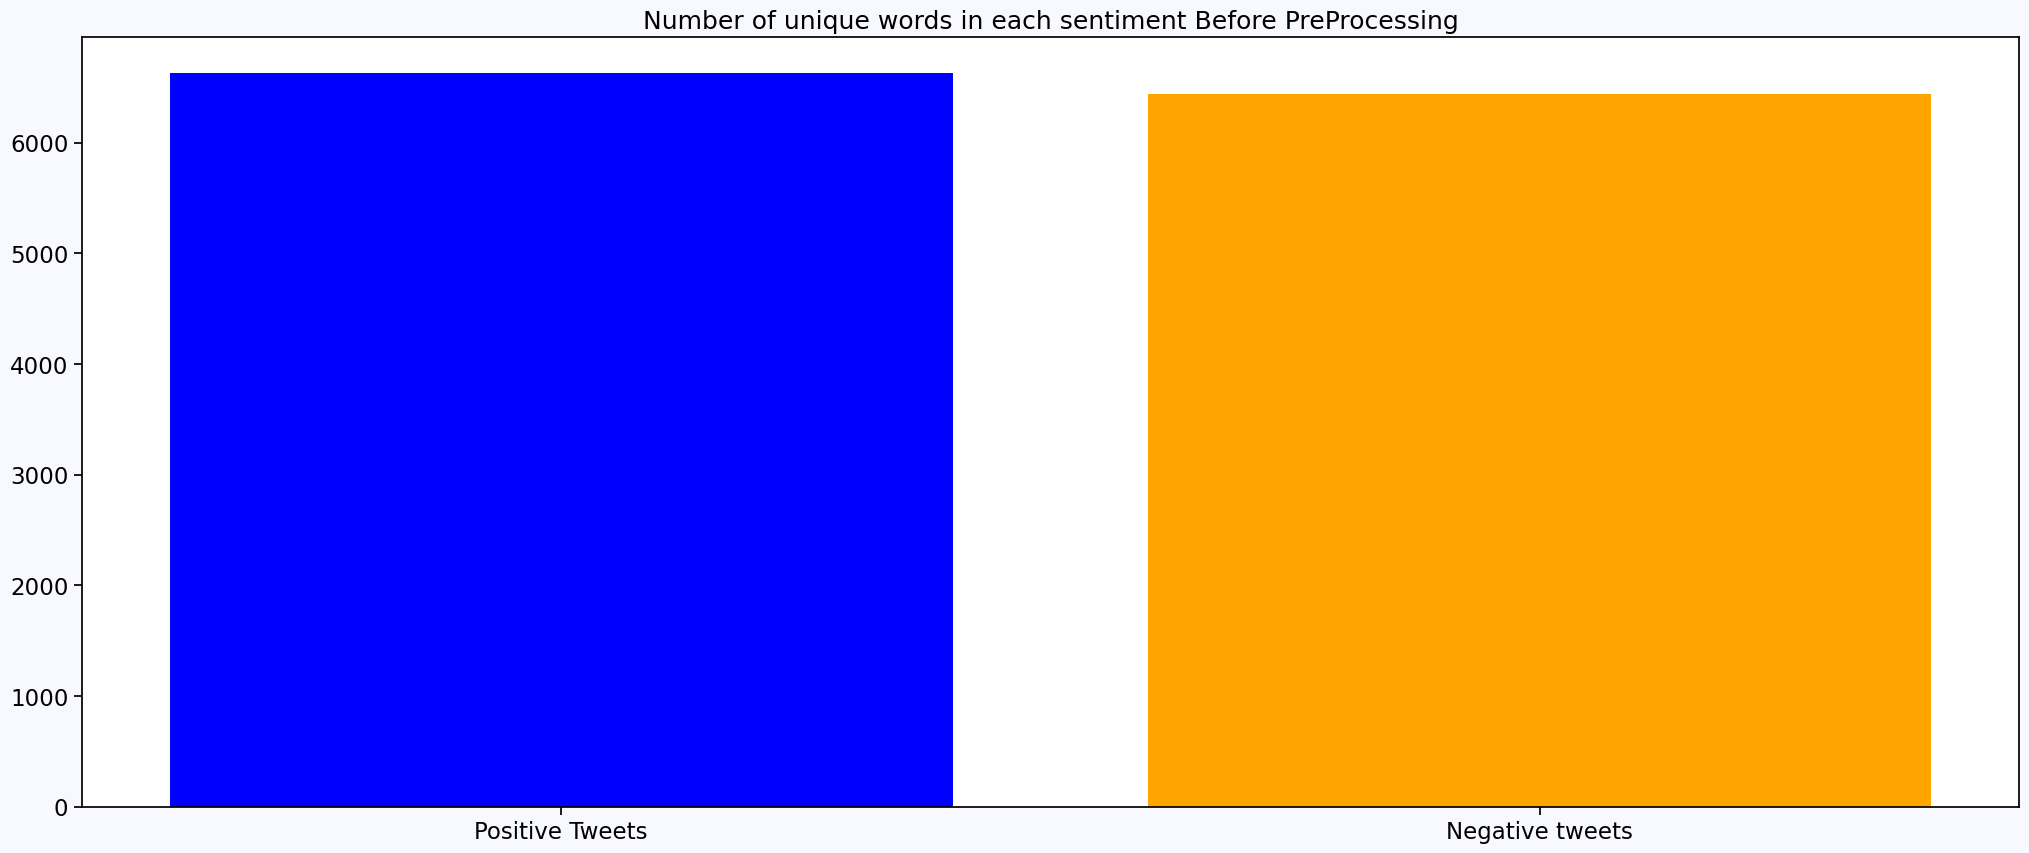

In [39]:

label_txt("Number of unique words in each sentiment Before PreProcessing" ,w = 0.03)
sns.set_context('notebook',font_scale= 1.5)
plt.rcParams['figure.facecolor'] = 'ghostwhite'
plt.rcParams['axes.facecolor'] = 'white'
fig, axs = plt.subplots(figsize = (25,10))

axs.bar(list(dict_tweets.keys())[:-1],[len(df_of_pos_neg_total[df_of_pos_neg_total["pos_freq"] > 0].drop_duplicates()),len(df_of_pos_neg_total[df_of_pos_neg_total["neg_freq"] > 0].drop_duplicates())] , color = ["blue", "orange"])
axs.set_title("Number of unique words in each sentiment Before PreProcessing")
plt.show()


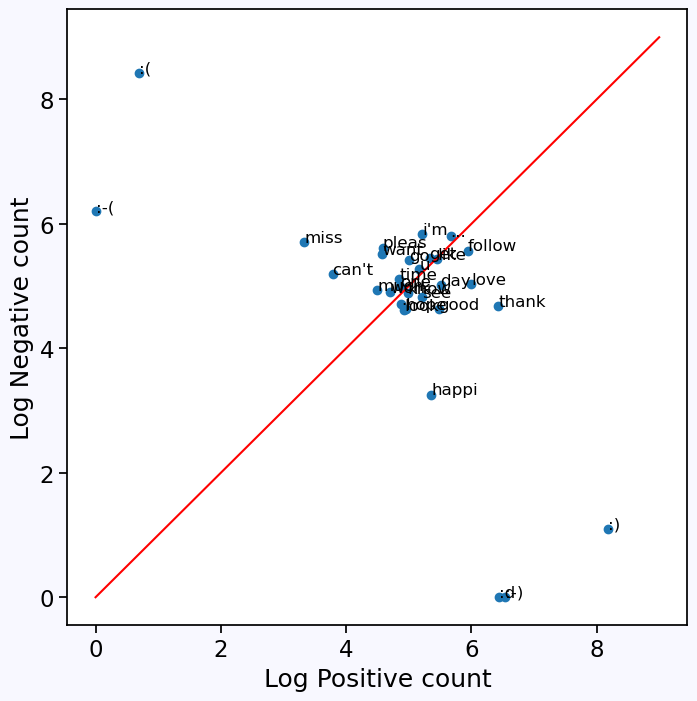

In [40]:
arr_of_top_30 = np.array(df_of_pos_neg_total.sort_values(by = "total_freq", ascending=False)[:30])

Visualizing_word_freq(arr_of_top_30)

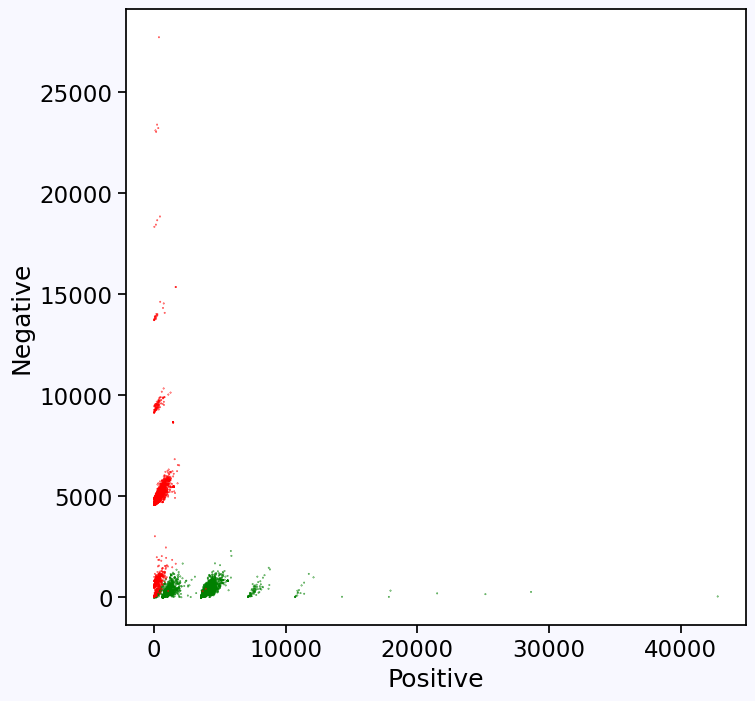

In [41]:
visualize_tweets_without_theta(cleaned_featuers,labels)

In [42]:
cleaned_featuers

array([[1.000e+00, 3.764e+03, 7.200e+01],
       [1.000e+00, 4.464e+03, 5.170e+02],
       [1.000e+00, 3.759e+03, 1.600e+02],
       ...,
       [1.000e+00, 3.400e+01, 4.640e+03],
       [1.000e+00, 1.000e+01, 4.585e+03],
       [1.000e+00, 1.160e+02, 5.820e+02]])

In [70]:
cleaned_featuers

array([[1.000e+00, 3.764e+03, 7.200e+01],
       [1.000e+00, 4.464e+03, 5.170e+02],
       [1.000e+00, 3.759e+03, 1.600e+02],
       ...,
       [1.000e+00, 3.400e+01, 4.640e+03],
       [1.000e+00, 1.000e+01, 4.585e+03],
       [1.000e+00, 1.160e+02, 5.820e+02]])

In [43]:
from sklearn.model_selection import train_test_split
X = cleaned_featuers.copy()
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.20, random_state=0 , stratify=y)

In [44]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

LR = LogisticRegression()

LR.fit(X_train,y_train)

y_pred = LR.predict(X_test)

print(f"Accuracy Score is {accuracy_score(y_test,y_pred)}")

Accuracy Score is 0.99


In [45]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(LR,X_train,y_train,cv = 4)
print(f'{i} Scores is  {scores}')
print(f'{i} Avg_Cv Score is  {np.mean(scores)}')

9 Scores is  [0.989  0.992  0.99   0.9895]
9 Avg_Cv Score is  0.990125


In [46]:
theta = LR.coef_.flatten()
theta

array([ 0.46141758,  0.00713891, -0.00807191])

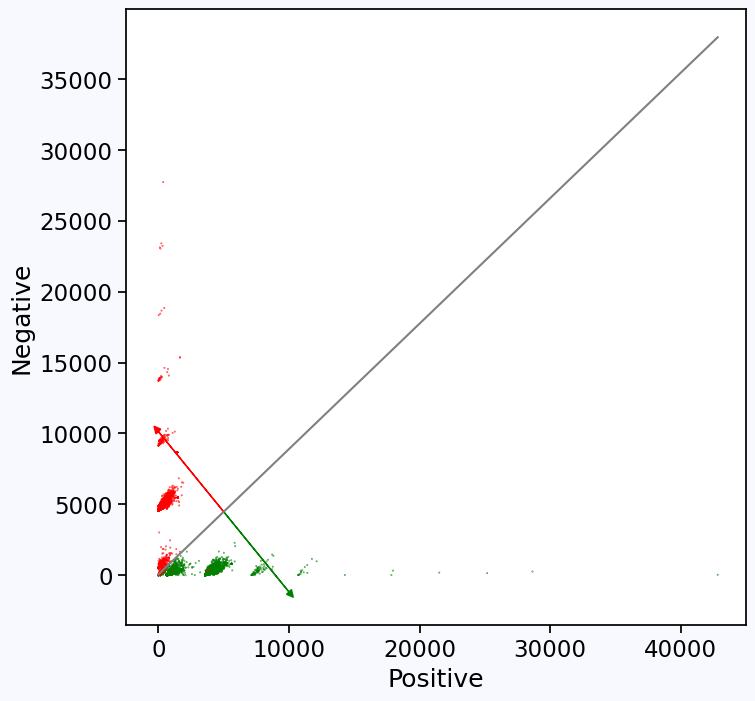

In [47]:
visualize_tweets_with_theta(X,y,theta)

              precision    recall  f1-score   support

         0.0       1.00      0.98      0.99      1000
         1.0       0.98      1.00      0.99      1000

    accuracy                           0.99      2000
   macro avg       0.99      0.99      0.99      2000
weighted avg       0.99      0.99      0.99      2000



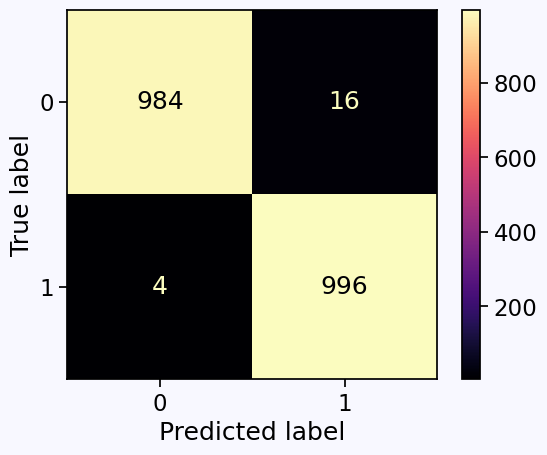

In [48]:
from sklearn.metrics import ConfusionMatrixDisplay,confusion_matrix,classification_report

ConfusionMatrixDisplay(confusion_matrix(y_test,y_pred)).plot(cmap='magma')

print(classification_report(y_test,y_pred))

In [49]:
from xgboost import XGBClassifier# XGBoost
from lightgbm import LGBMClassifier
import lightgbm as lgb  # LightGBM
from sklearn.ensemble import AdaBoostClassifier,BaggingClassifier,ExtraTreesClassifier,GradientBoostingClassifier,HistGradientBoostingClassifier,RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from catboost import CatBoostClassifier
model_dict = {
    
    'RandomForestClassifier': RandomForestClassifier(
    
    ),
    
    
    'LogisticRegression':LogisticRegression(
        max_iter=1000
    ),
    
    
    'AdaBoostClassifier': AdaBoostClassifier(
    
    ),
    'BaggingClassifier': BaggingClassifier (
    
    ),
    
    'ExtraTreesClassifier' : ExtraTreesClassifier(
    
    ),
    
    'GradientBoostingClassifier' : GradientBoostingClassifier(
    
    ),
    
    'HistGradientBoostingClassifier': HistGradientBoostingClassifier(
    
    ),
    
    'CatBoostClassifier' : CatBoostClassifier(
        silent=True
    ),
    
    'XGBClassifier': XGBClassifier(
                silent=True

    ),
    
    'LGBMClassifier': LGBMClassifier(
        silent=True

    )
}

In [50]:
from sklearn.metrics import roc_auc_score,roc_curve

model_name = []
model_cv = []
model_roc = []

model_ypred_prop = []
model_ypred = []


for i in model_dict:
    
    model = model_dict[i]
    
    scores = cross_val_score(model,X_train,y_train,cv = 4)
    print(f'{i} Avg_Cv Score is  {np.mean(scores)}')
    
    
    model.fit(X_train,y_train)
    
    
    
    model_name.append(i)
    model_cv.append(np.mean(scores))
    
    
    y_pred_prop = model.predict_proba(X_test)[:,1]
    y_pred = model.predict(X_test)
    
    
    model_ypred_prop.append(y_pred_prop)
    model_ypred.append(y_pred)
    
    model_roc.append(roc_auc_score(y_test,y_pred_prop))
    
    print('-' * 30)

RandomForestClassifier Avg_Cv Score is  0.991625
------------------------------
LogisticRegression Avg_Cv Score is  0.990125
------------------------------
AdaBoostClassifier Avg_Cv Score is  0.991375
------------------------------
BaggingClassifier Avg_Cv Score is  0.99075
------------------------------
ExtraTreesClassifier Avg_Cv Score is  0.992
------------------------------
GradientBoostingClassifier Avg_Cv Score is  0.99225
------------------------------
HistGradientBoostingClassifier Avg_Cv Score is  0.992
------------------------------
CatBoostClassifier Avg_Cv Score is  0.992125
------------------------------


c:\Users\omaro\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:45:30] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "silent" } are not used.

  warnings.warn(smsg, UserWarning)
c:\Users\omaro\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:45:30] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "silent" } are not used.

  warnings.warn(smsg, UserWarning)
c:\Users\omaro\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:45:30] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "silent" } are not used.

  warnings.warn(smsg, UserWarning)
c:\Users\omaro\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning:

XGBClassifier Avg_Cv Score is  0.9916250000000001
------------------------------
[LightGBM] [Warning] Unknown parameter: silent
[LightGBM] [Warning] Unknown parameter: silent
[LightGBM] [Info] Number of positive: 3000, number of negative: 3000
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000529 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 510
[LightGBM] [Info] Number of data points in the train set: 6000, number of used features: 2
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Unknown parameter: silent
[LightGBM] [Warning] Unknown parameter: silent
[LightGBM] [Warning] Unknown parameter: silent
[LightGBM] [Info] Number of positive: 3000, number of negative: 3000
[LightGBM] [Info] Auto-choosing col-wise m

c:\Users\omaro\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:45:31] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "silent" } are not used.

  warnings.warn(smsg, UserWarning)


[LightGBM] [Warning] Unknown parameter: silent
[LightGBM] [Warning] Unknown parameter: silent
[LightGBM] [Info] Number of positive: 3000, number of negative: 3000
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000052 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 510
[LightGBM] [Info] Number of data points in the train set: 6000, number of used features: 2
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Unknown parameter: silent
LGBMClassifier Avg_Cv Score is  0.9906250000000001
[LightGBM] [Warning] Unknown parameter: silent
[LightGBM] [Warning] Unknown parameter: silent
[LightGBM] [Info] Number of positive: 4000, number of negative: 4000
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000060 seconds.
You can set `force_col_wise=true

In [51]:
dict_model_info = {
    'CV Score':model_cv,
    'ROC':model_roc
    
}

df_model_eva = pd.DataFrame(dict_model_info ,index = model_name)
df_model_eva.sort_values(['CV Score','ROC'],axis = 0,ascending = False)

CV Score       ROC
GradientBoostingClassifier      0.992250  0.999863
CatBoostClassifier              0.992125  0.999903
HistGradientBoostingClassifier  0.992000  0.999800
ExtraTreesClassifier            0.992000  0.999369
XGBClassifier                   0.991625  0.999791
RandomForestClassifier          0.991625  0.999393
AdaBoostClassifier              0.991375  0.999828
BaggingClassifier               0.990750  0.999409
LGBMClassifier                  0.990625  0.999786
LogisticRegression              0.990125  0.999767

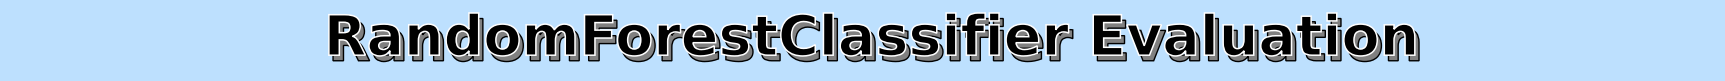

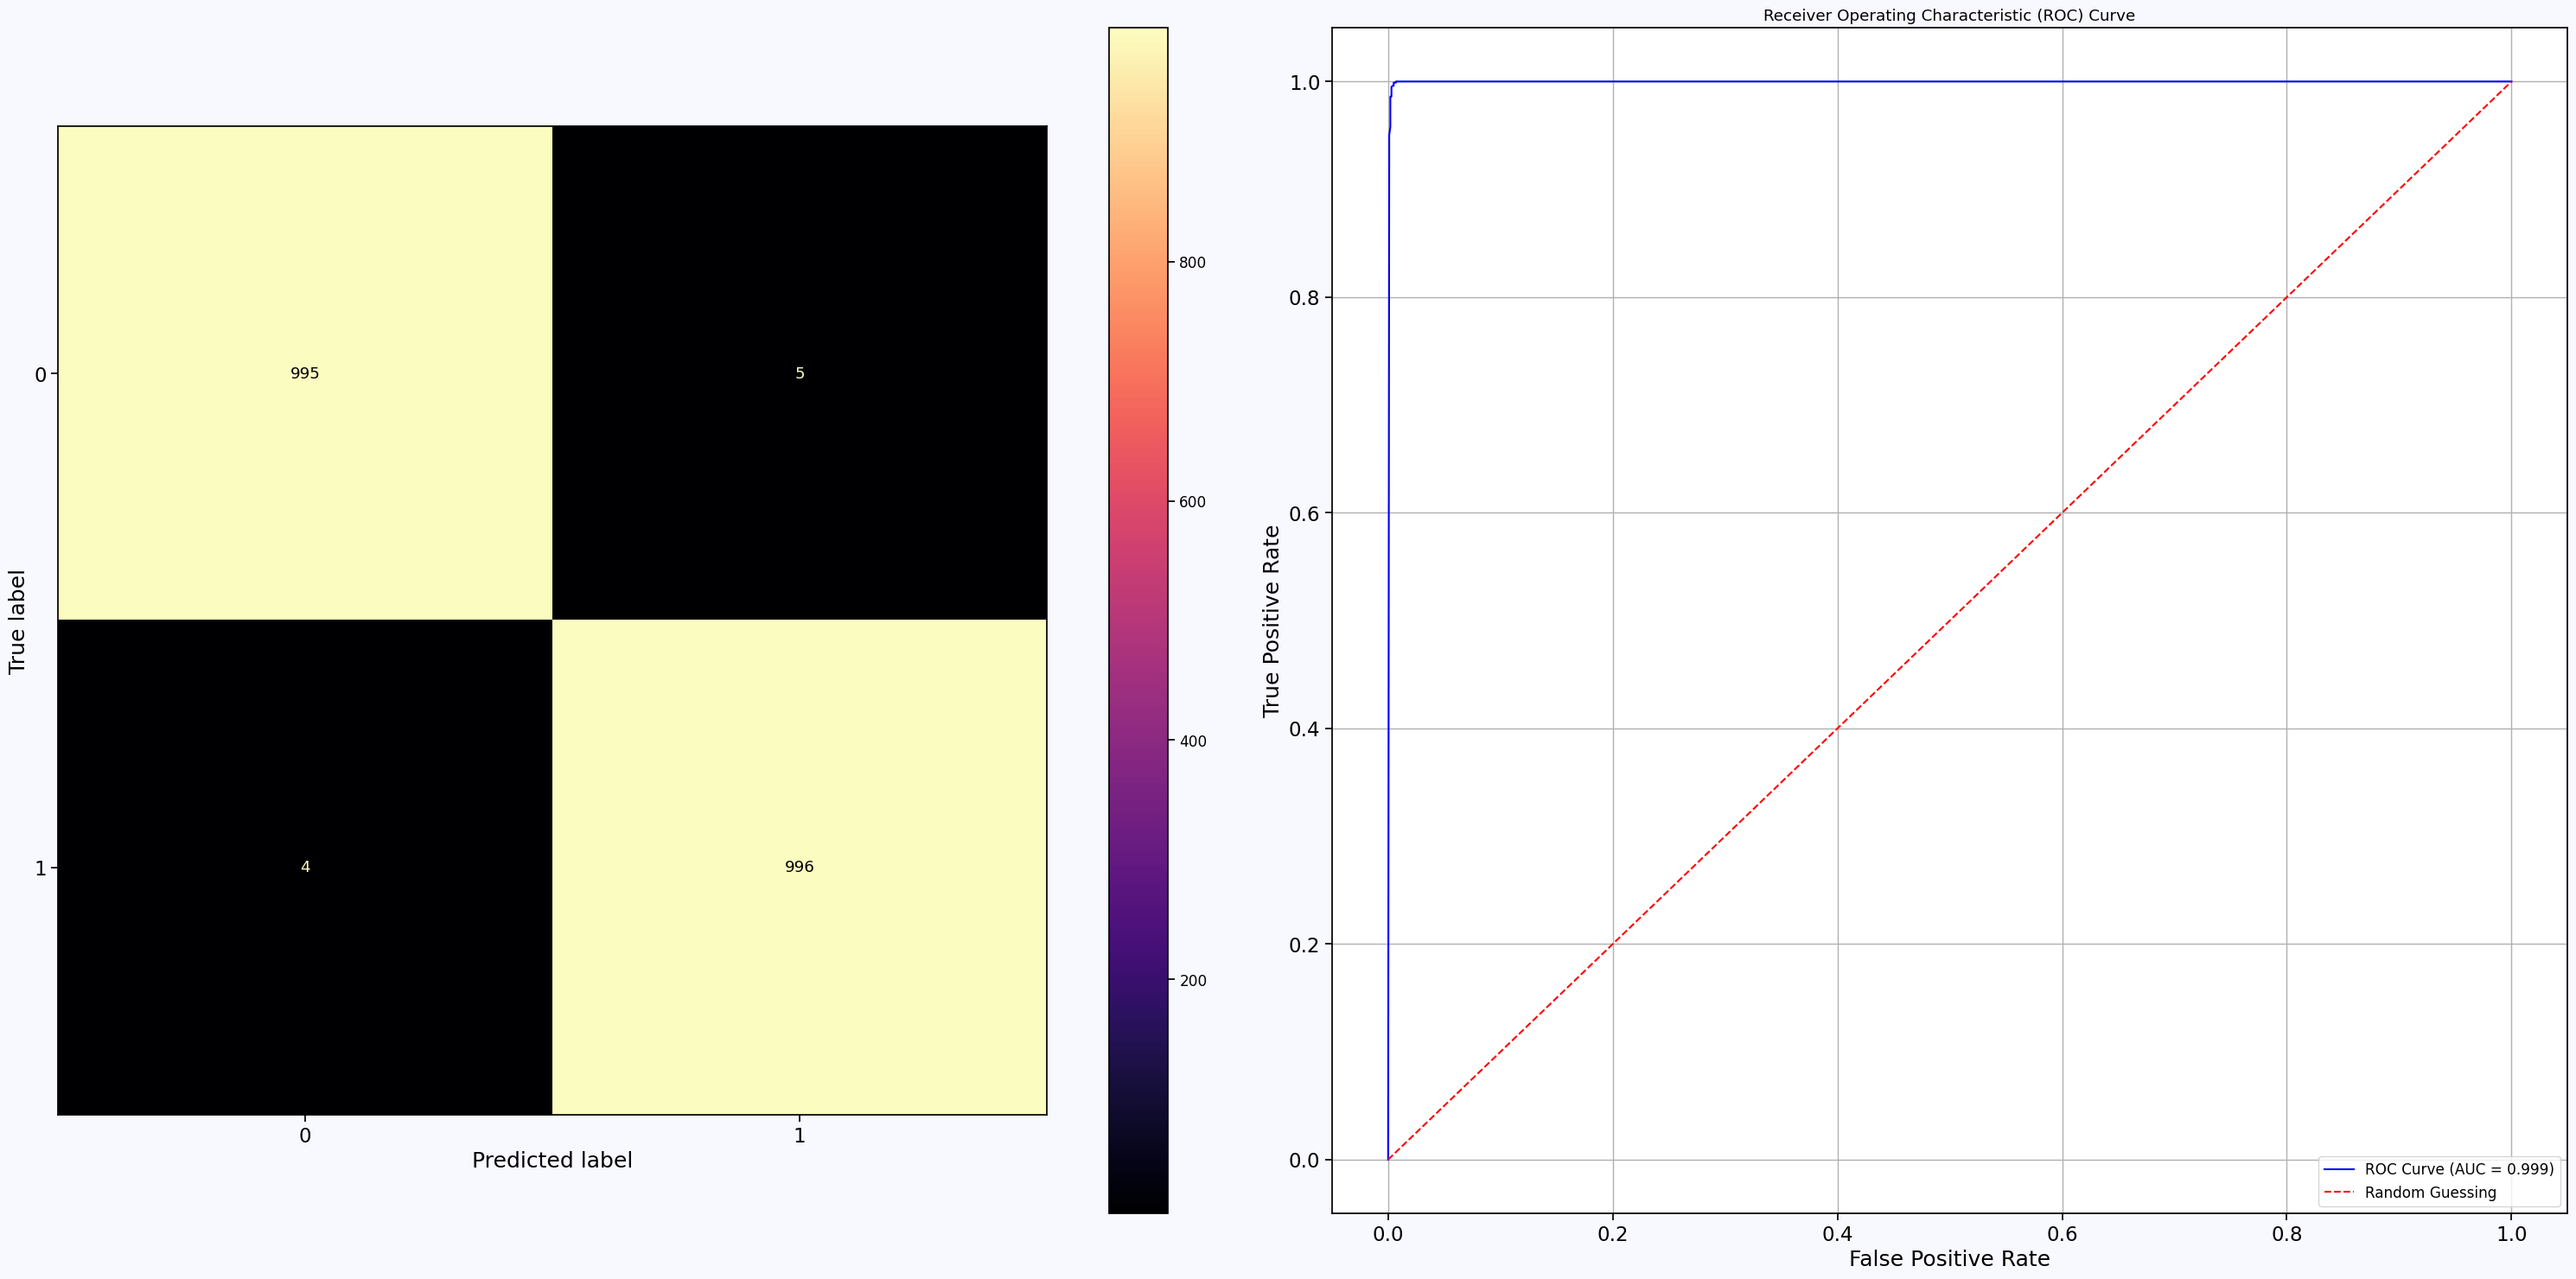

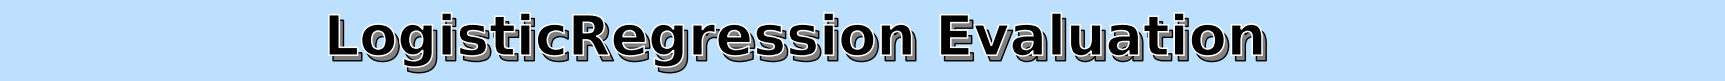

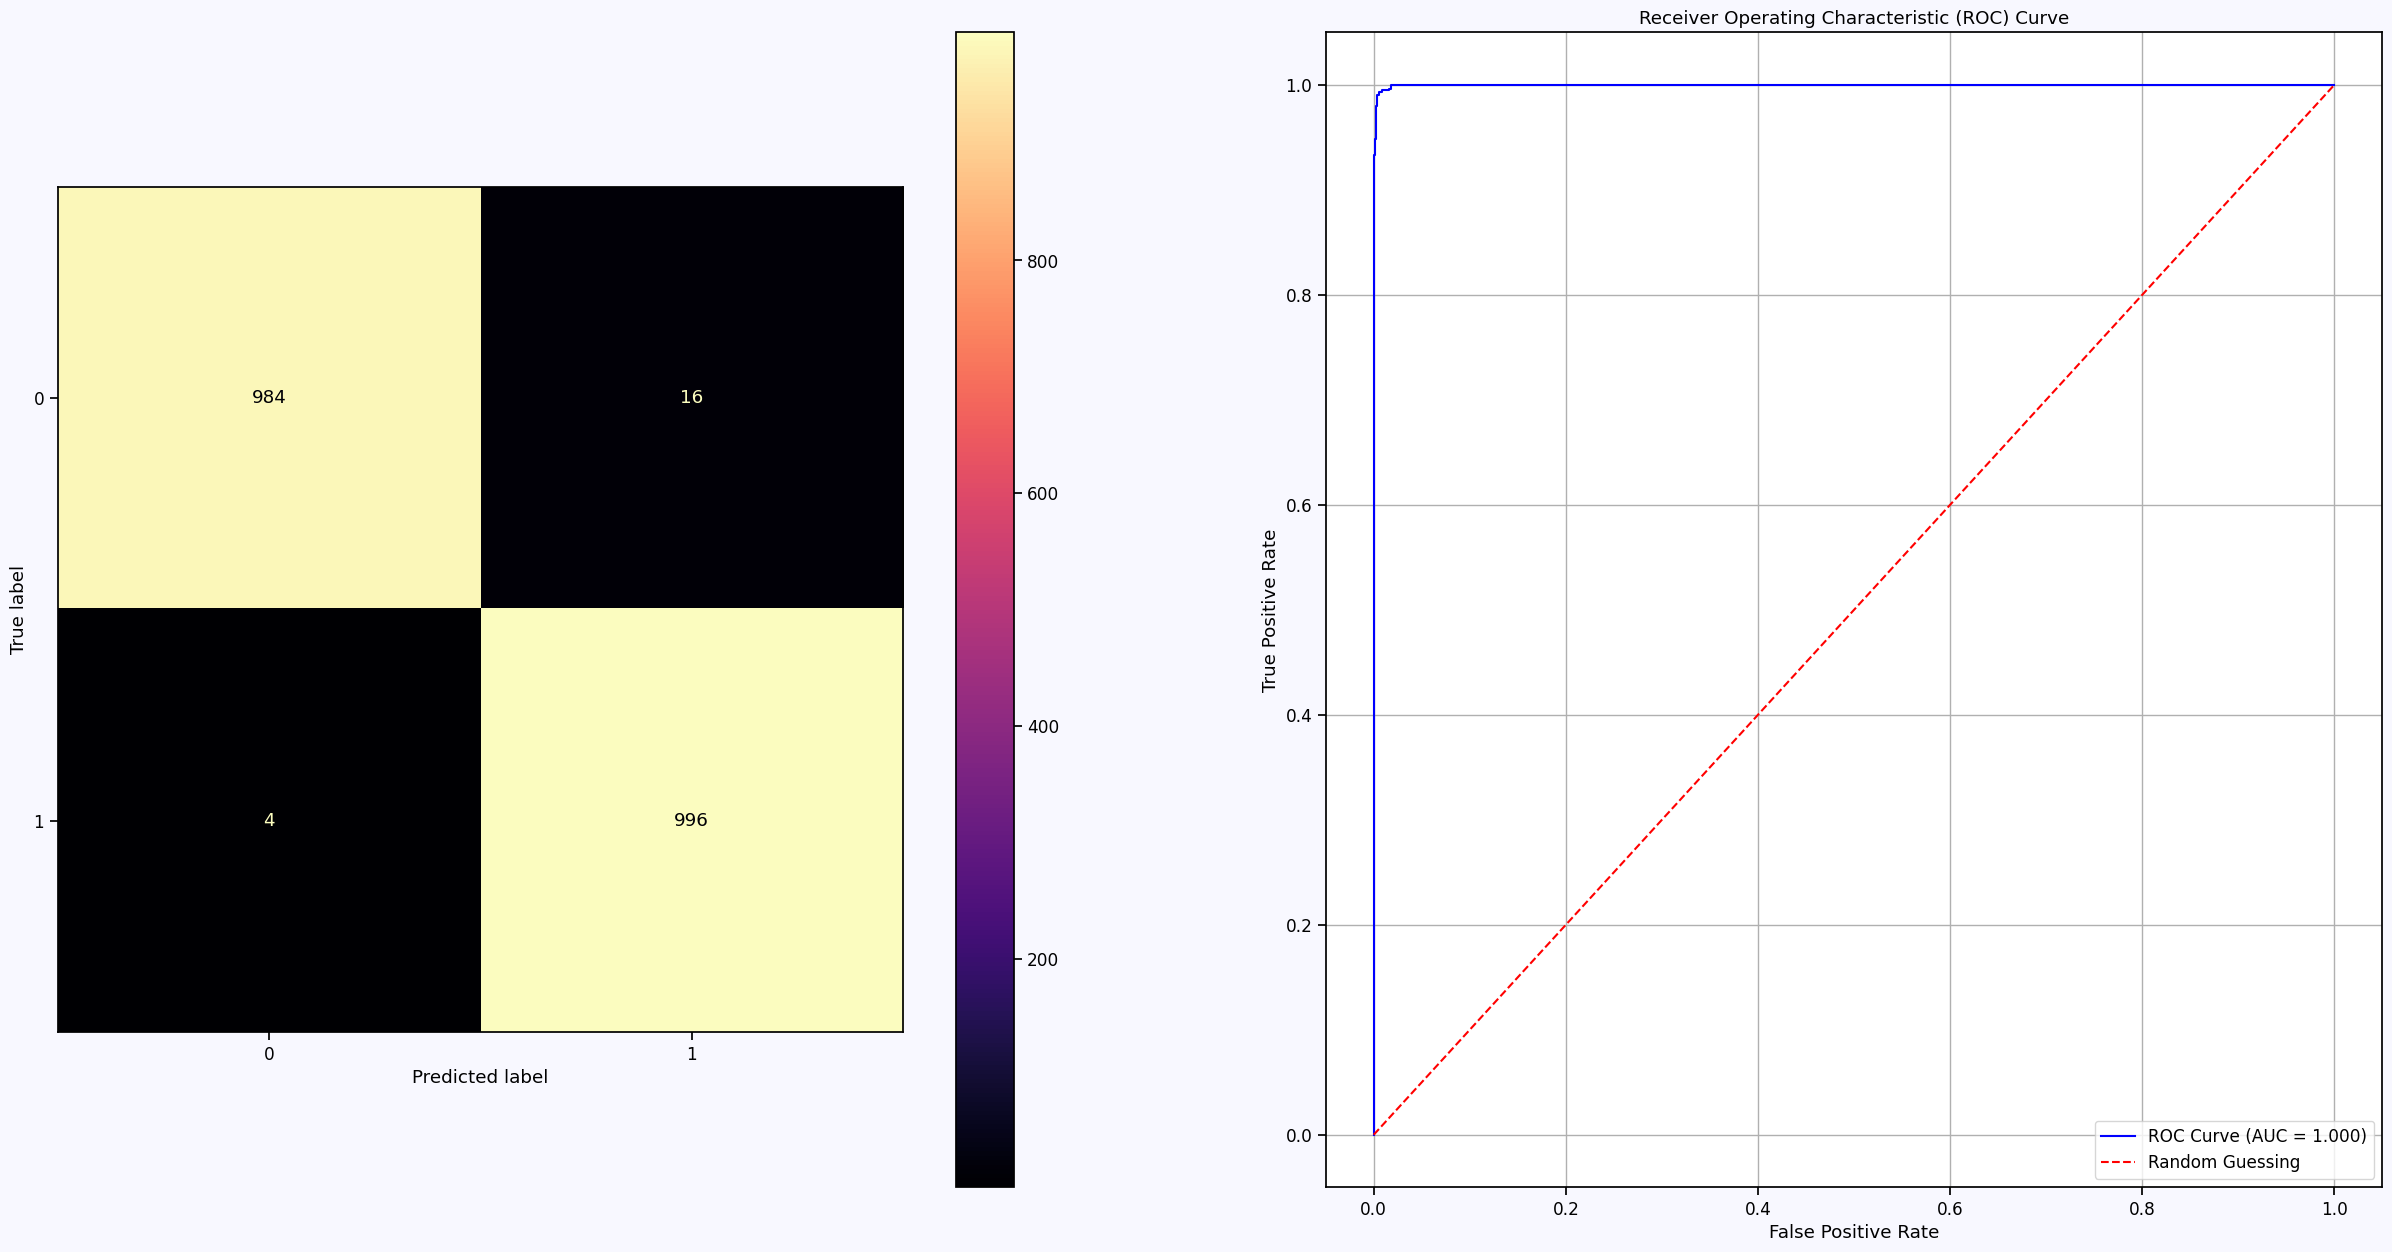

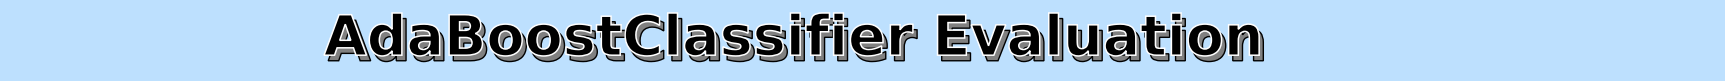

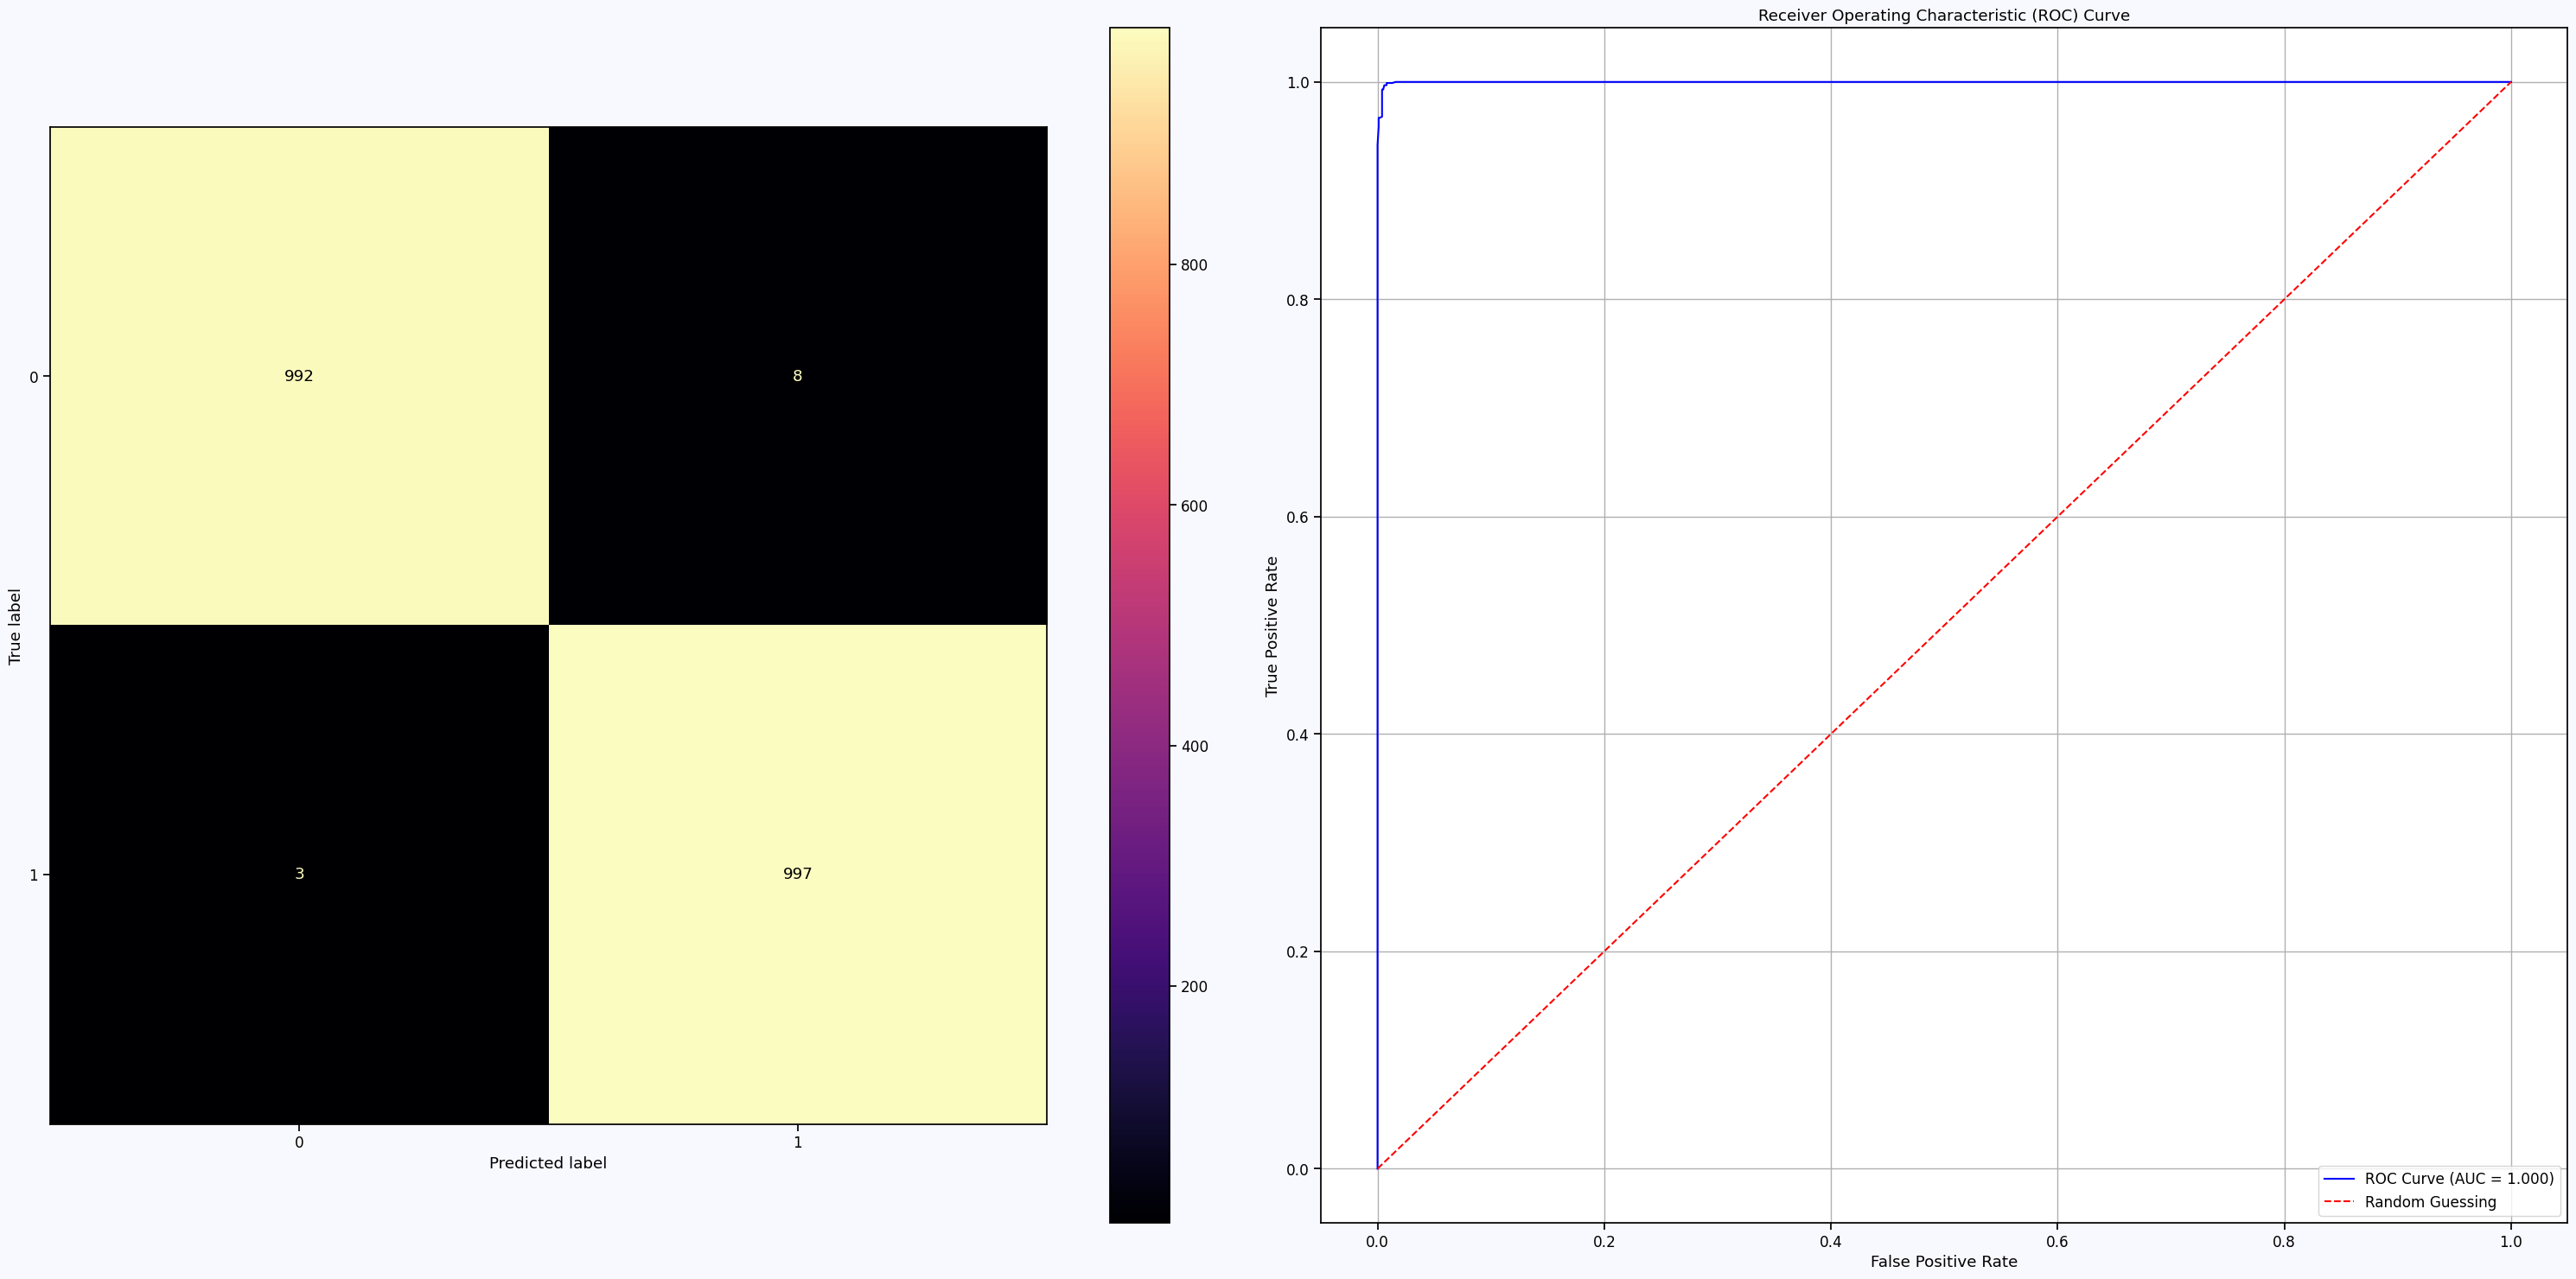

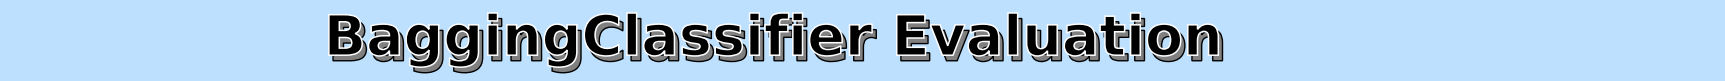

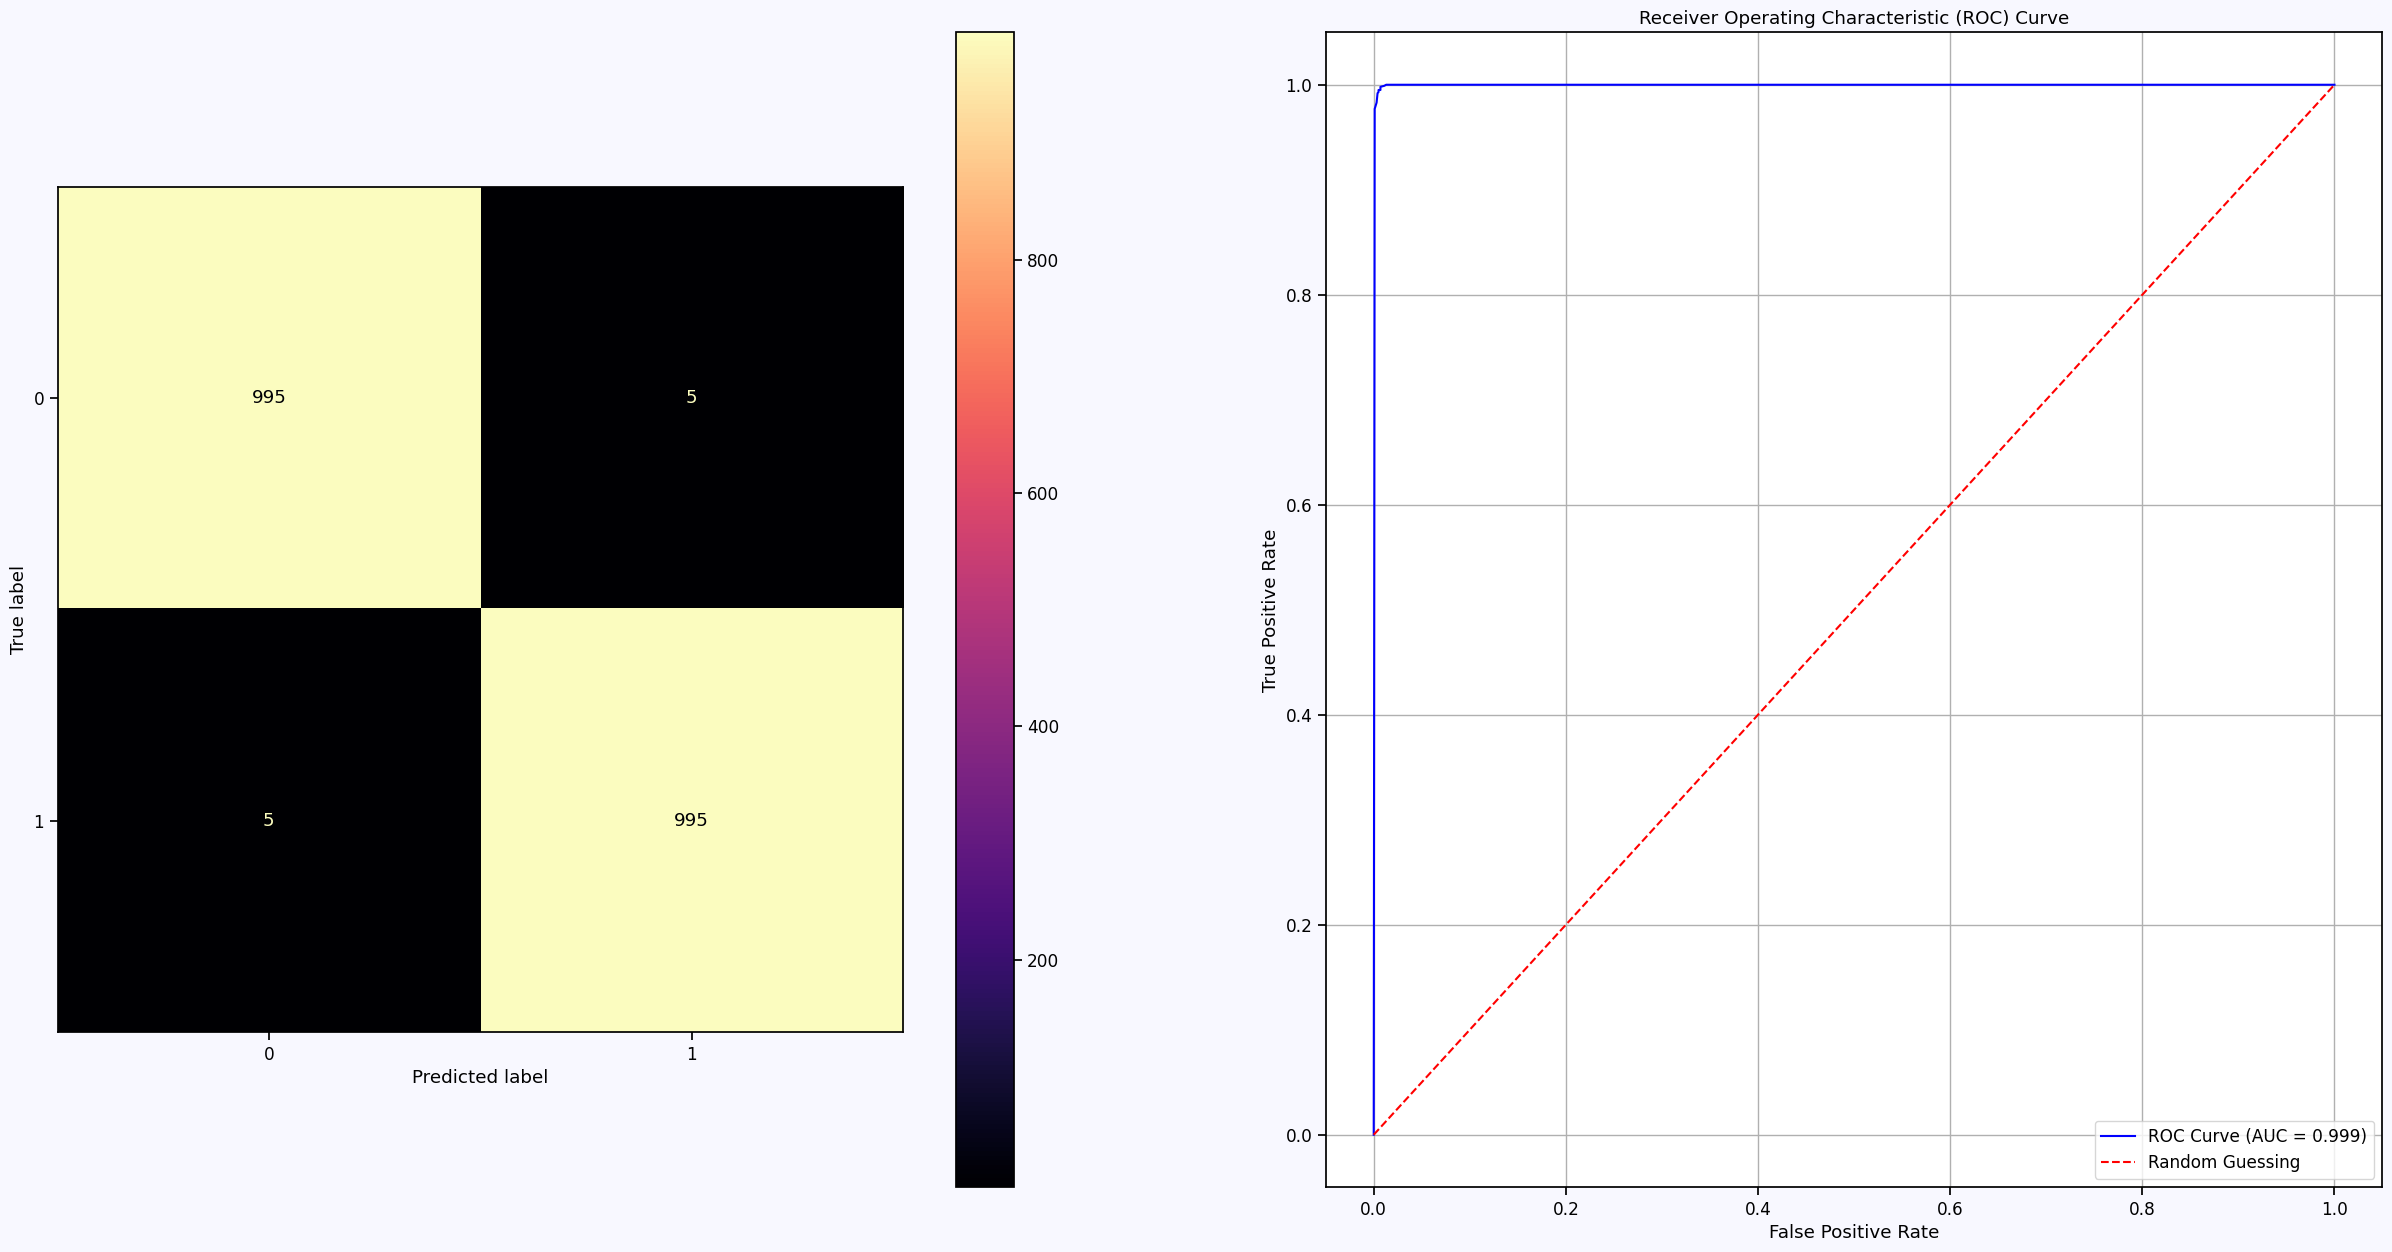

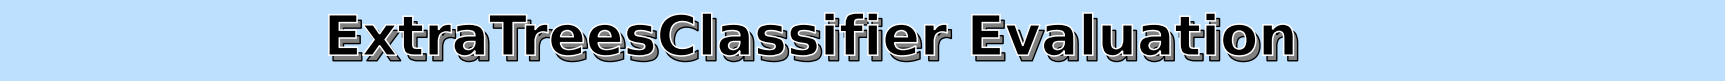

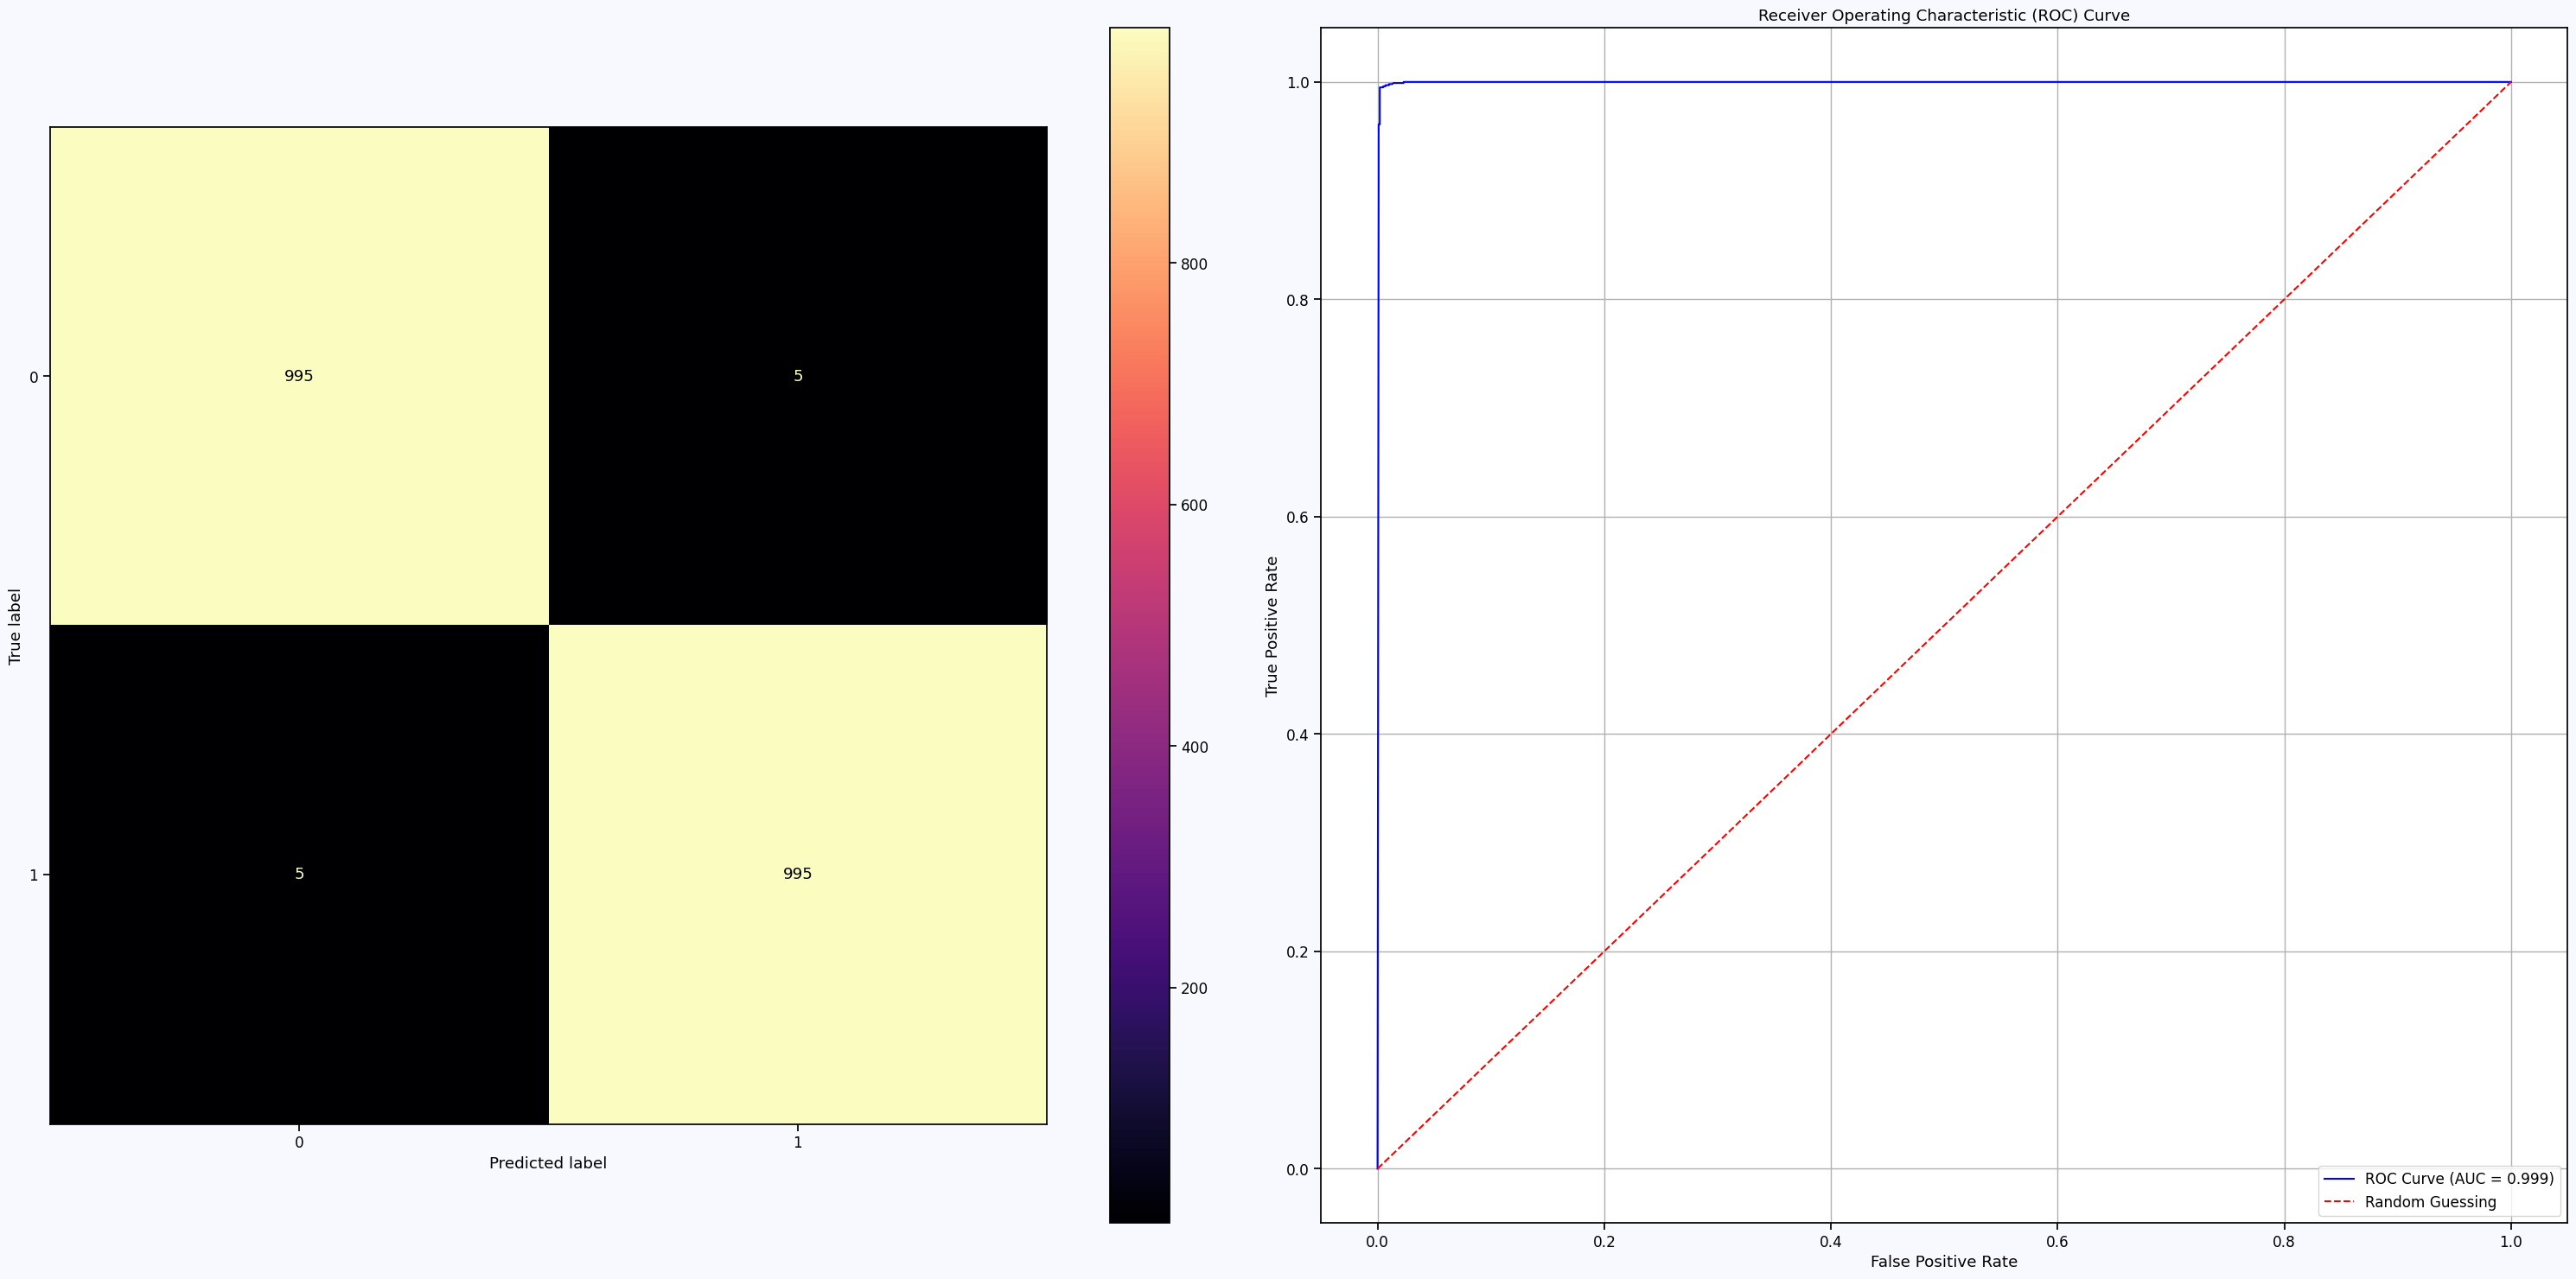

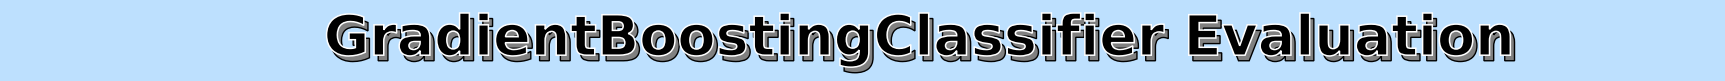

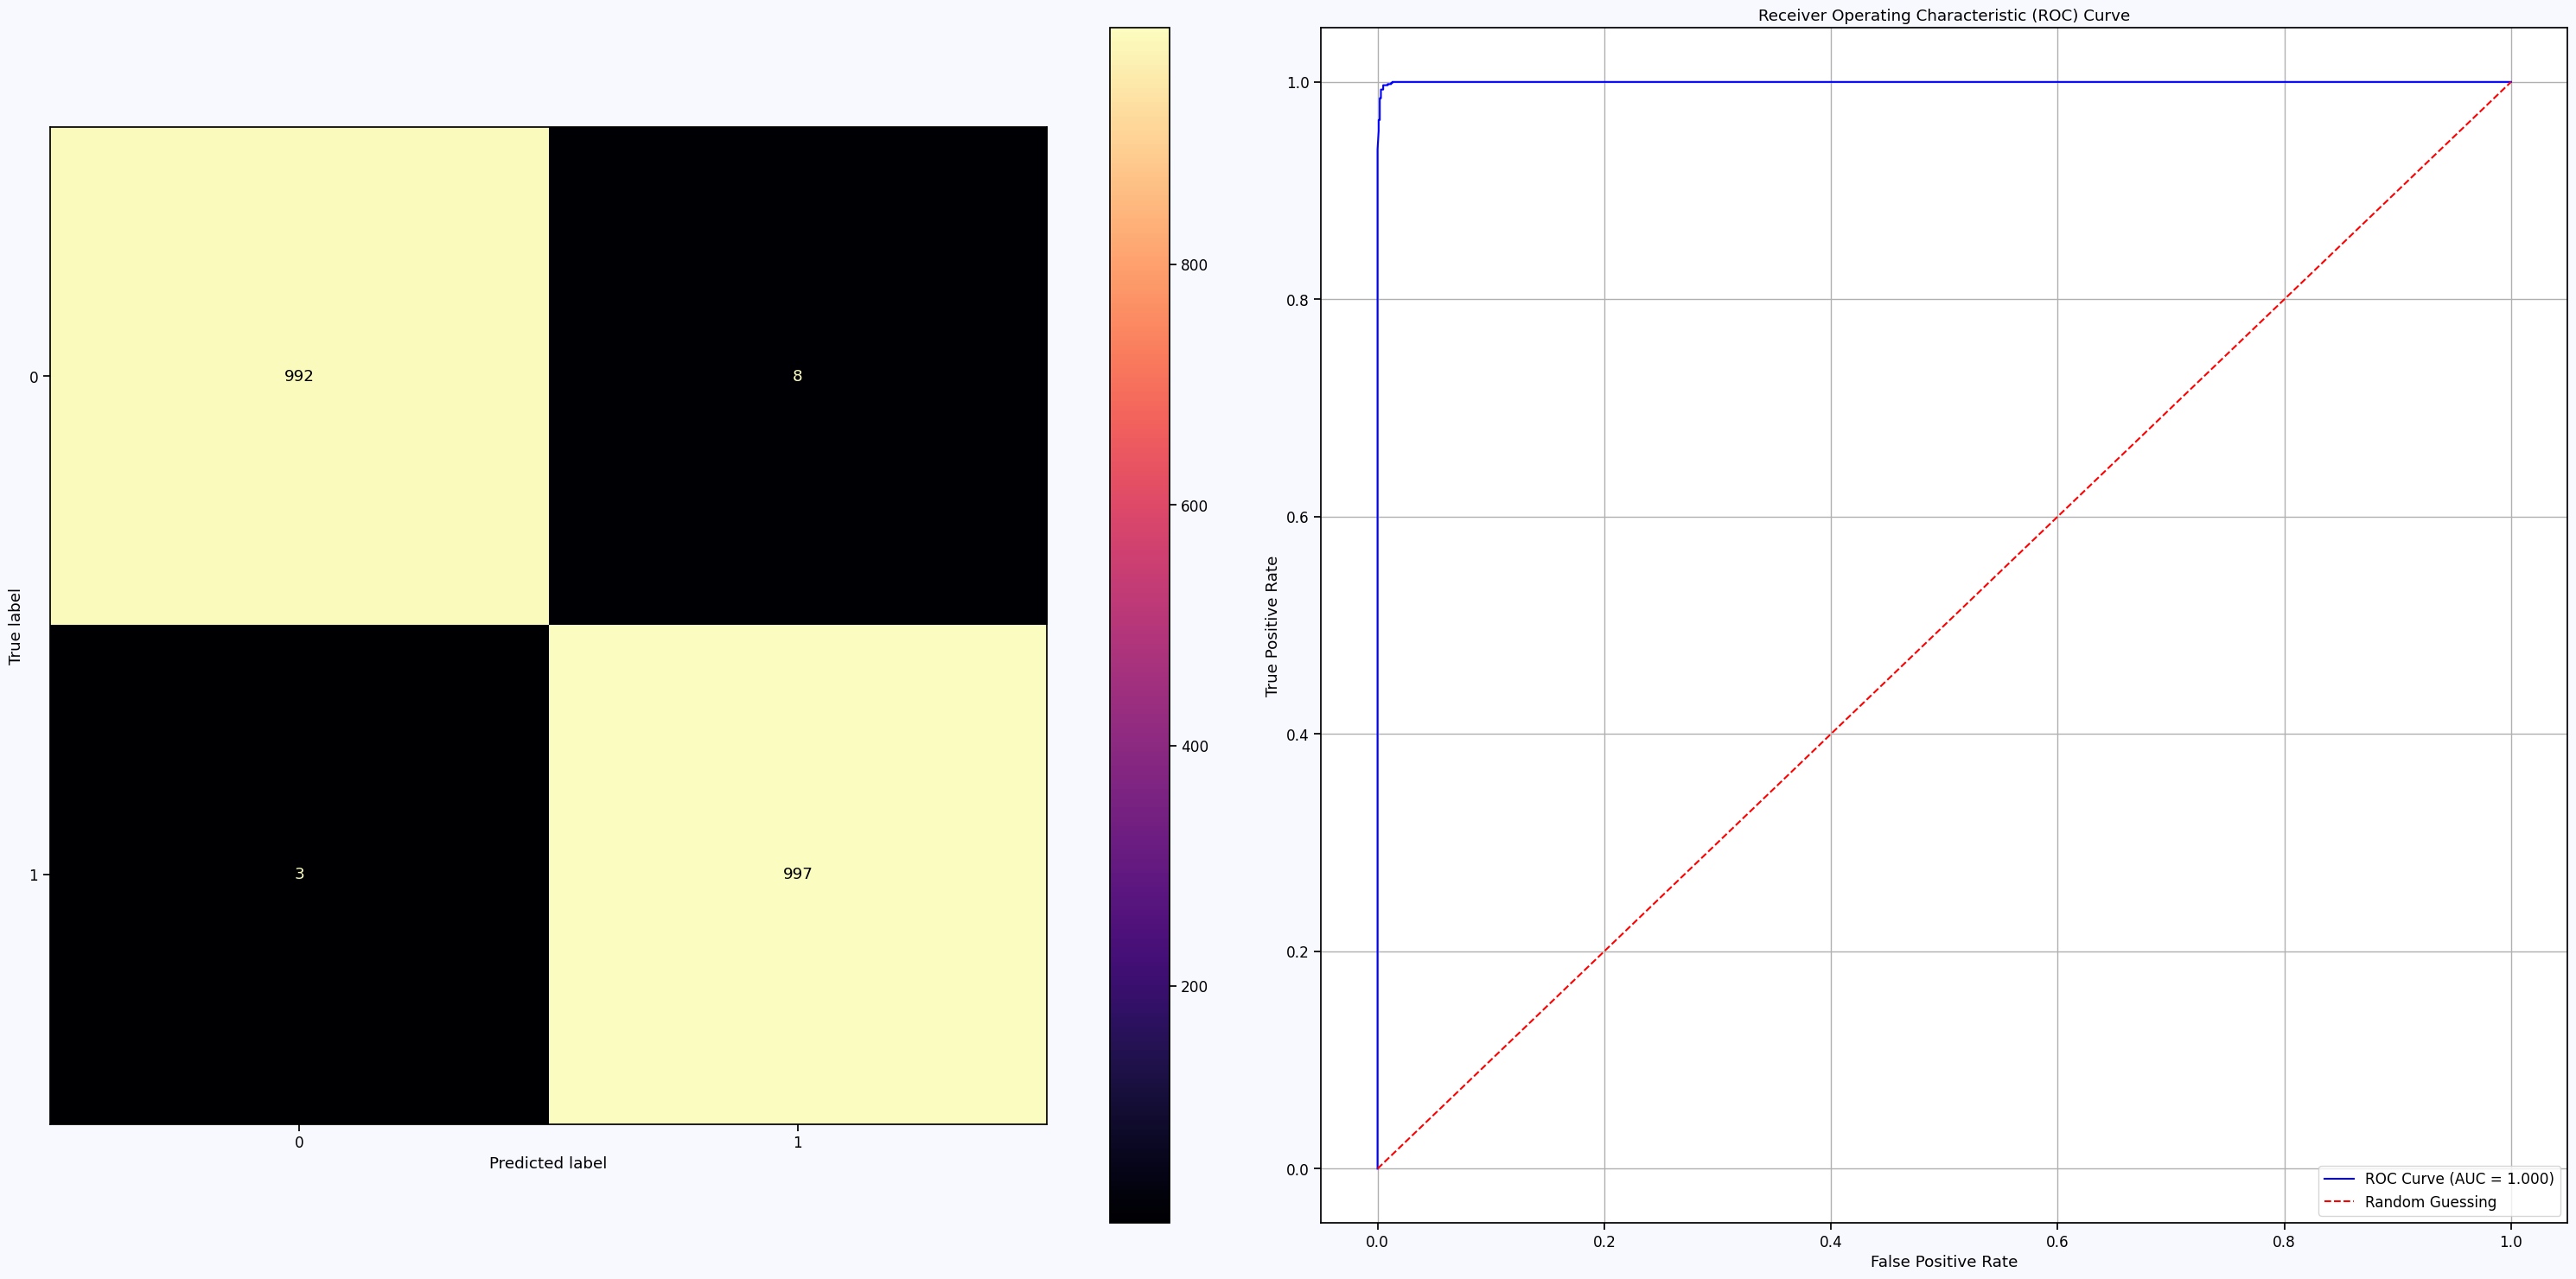

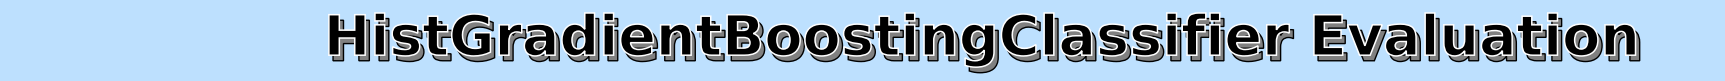

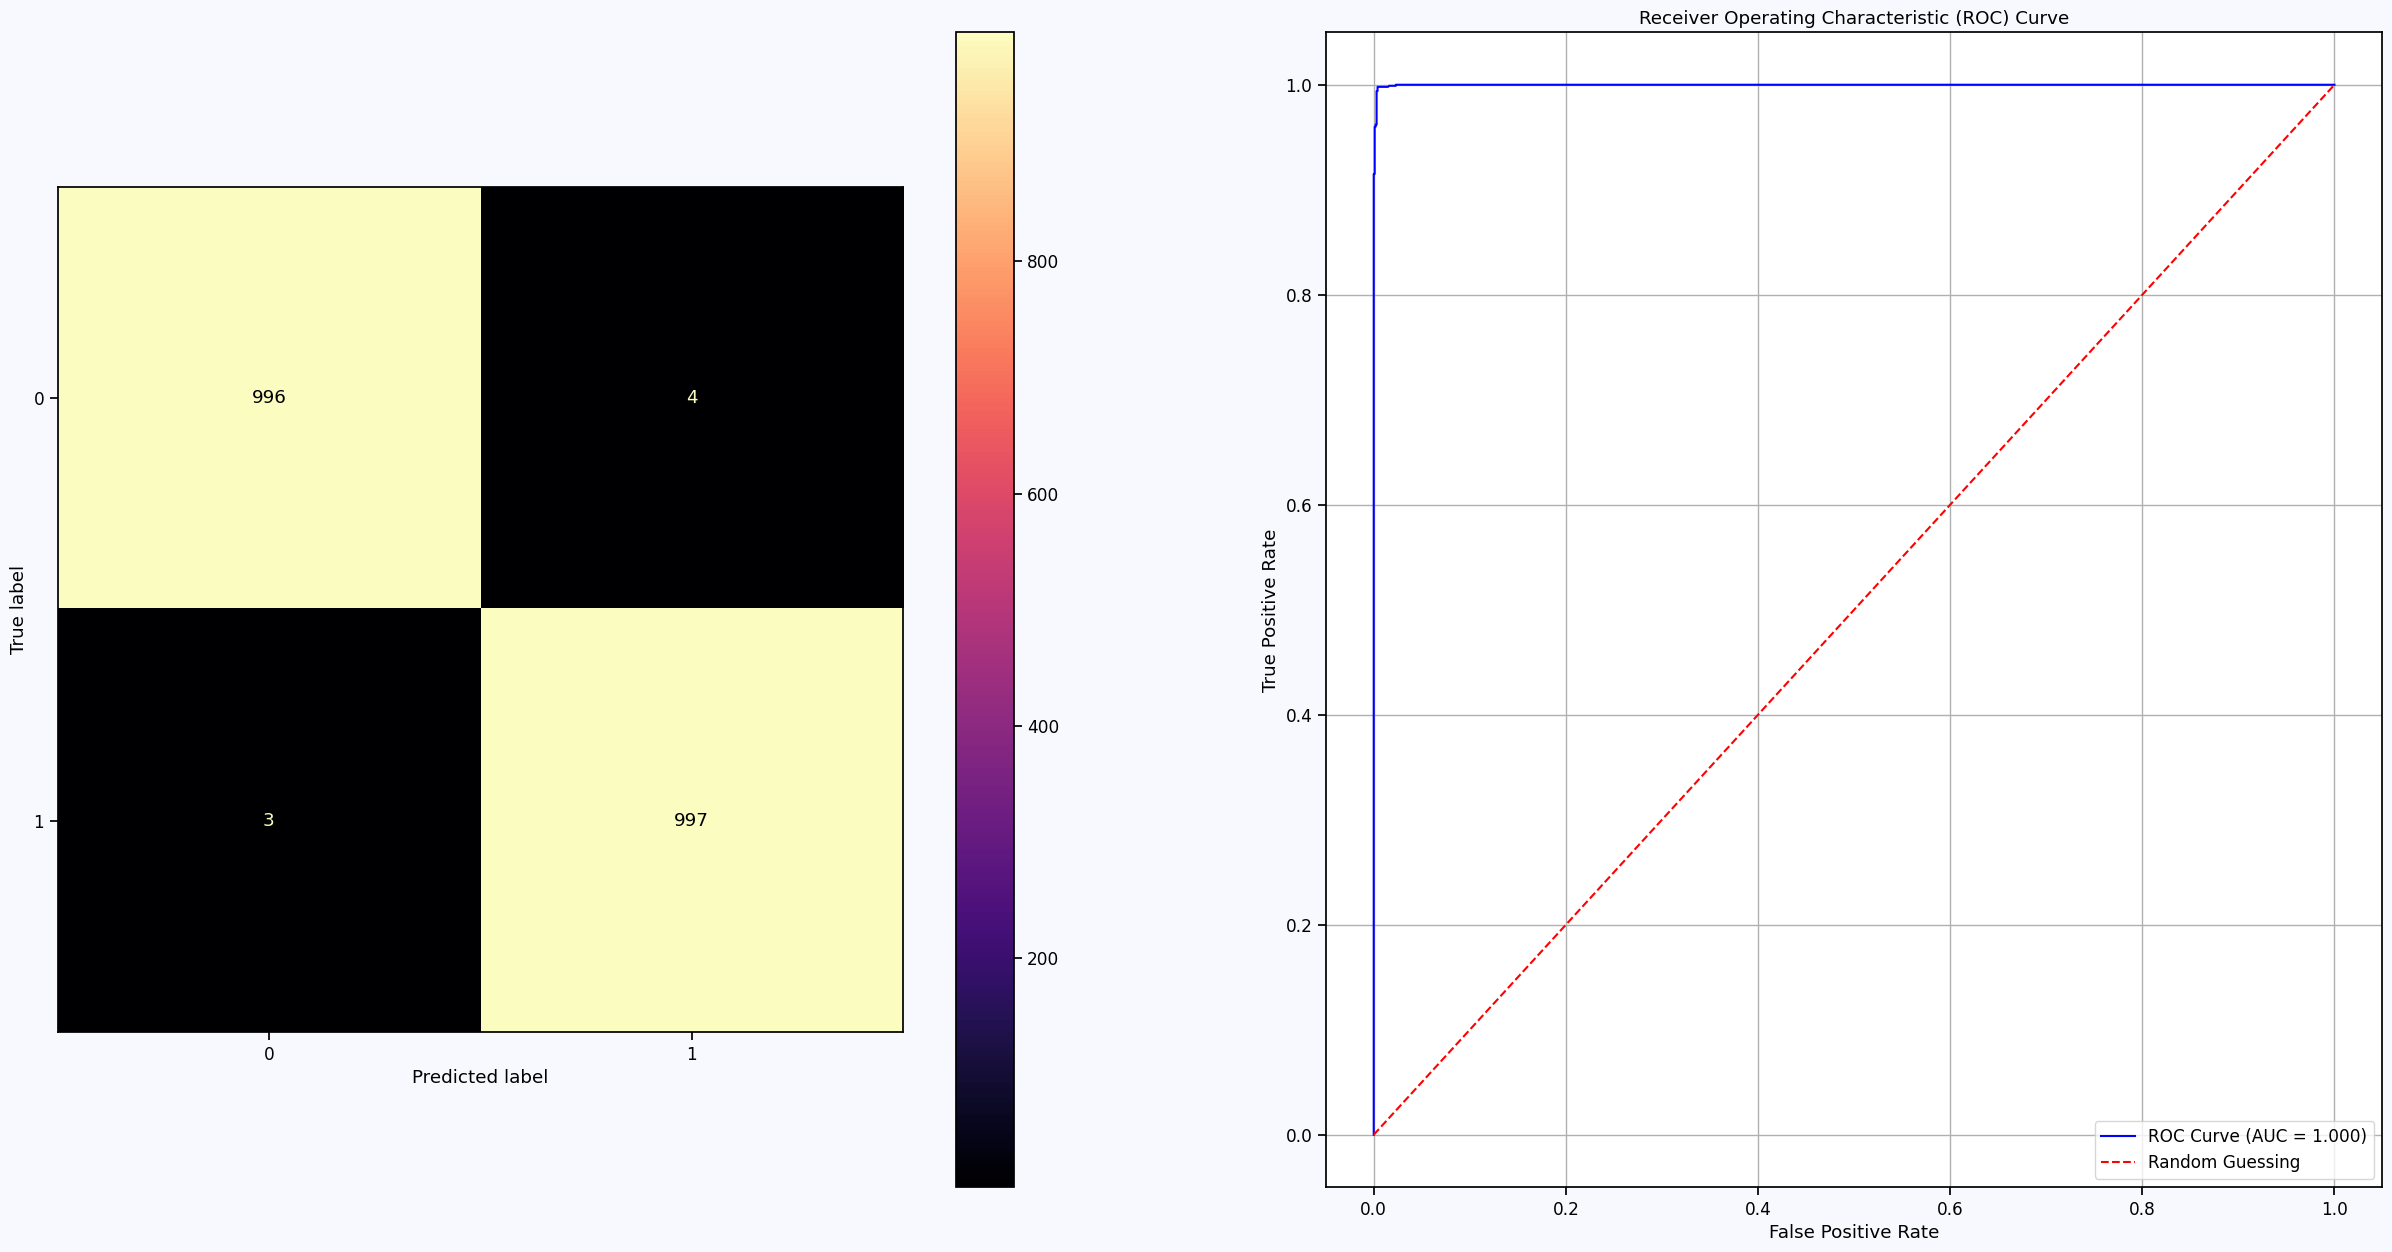

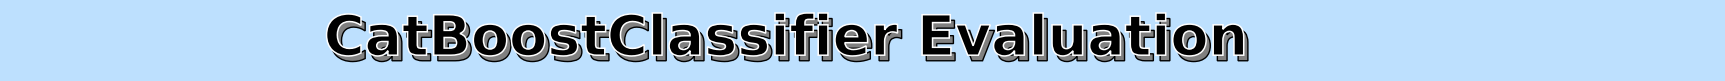

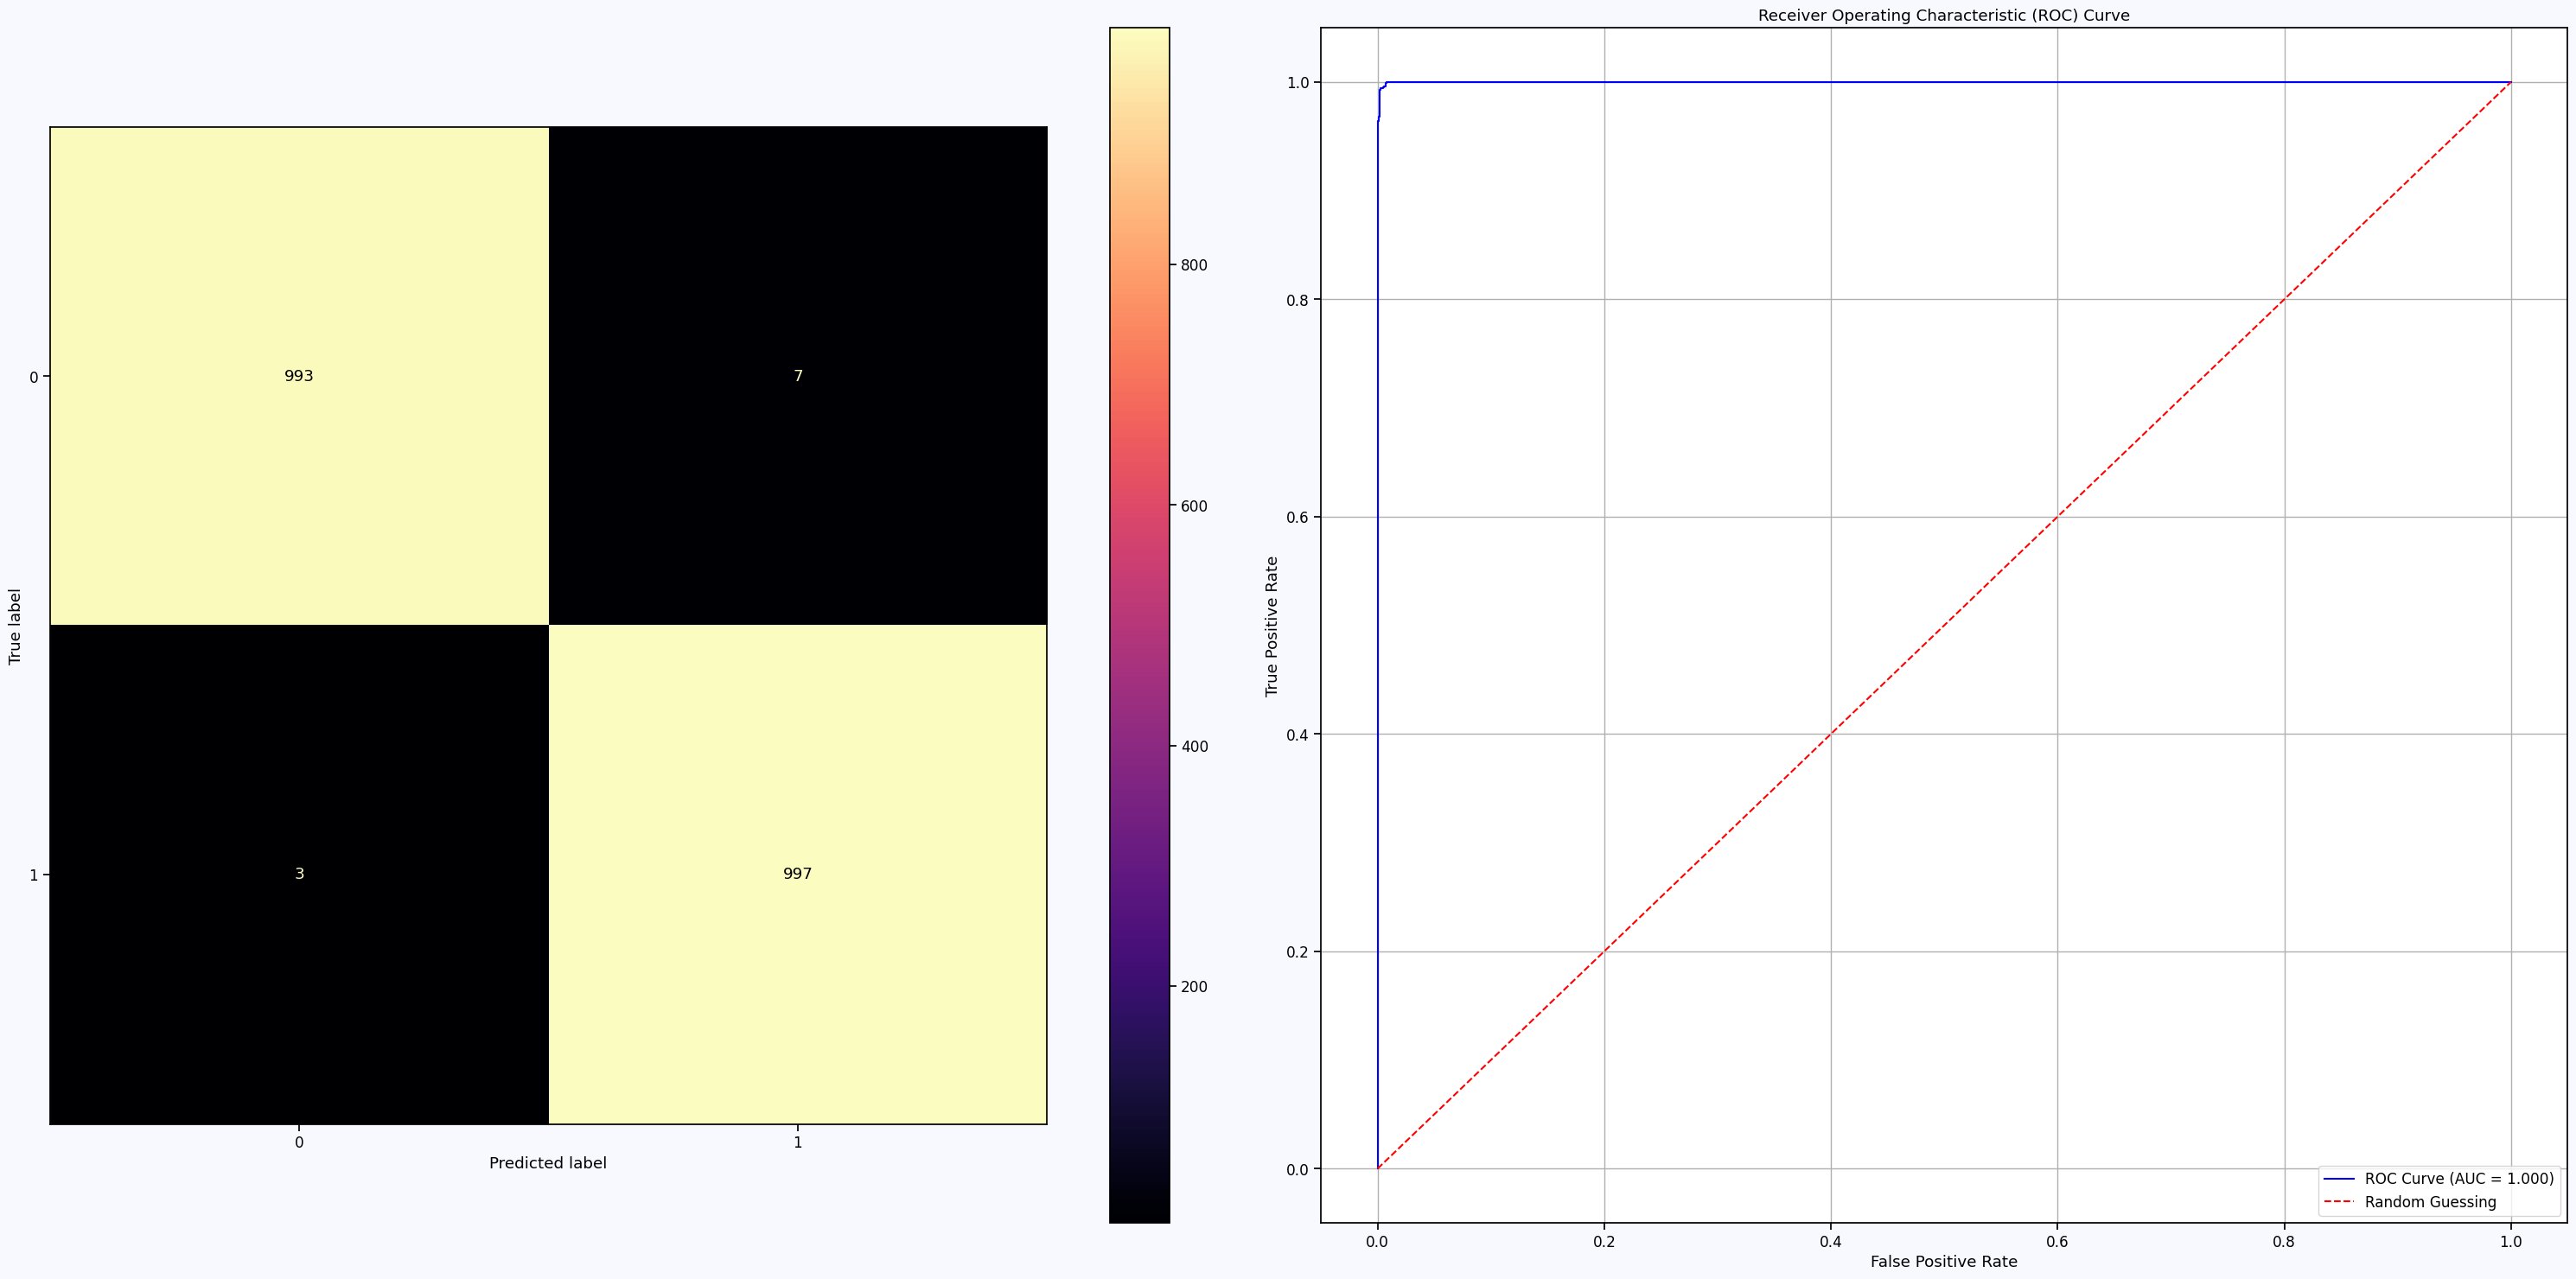

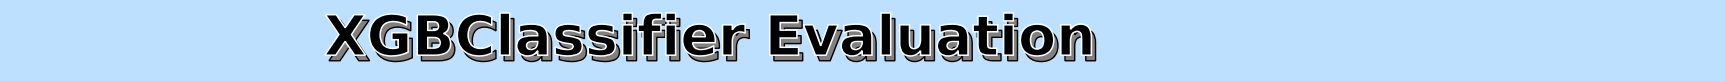

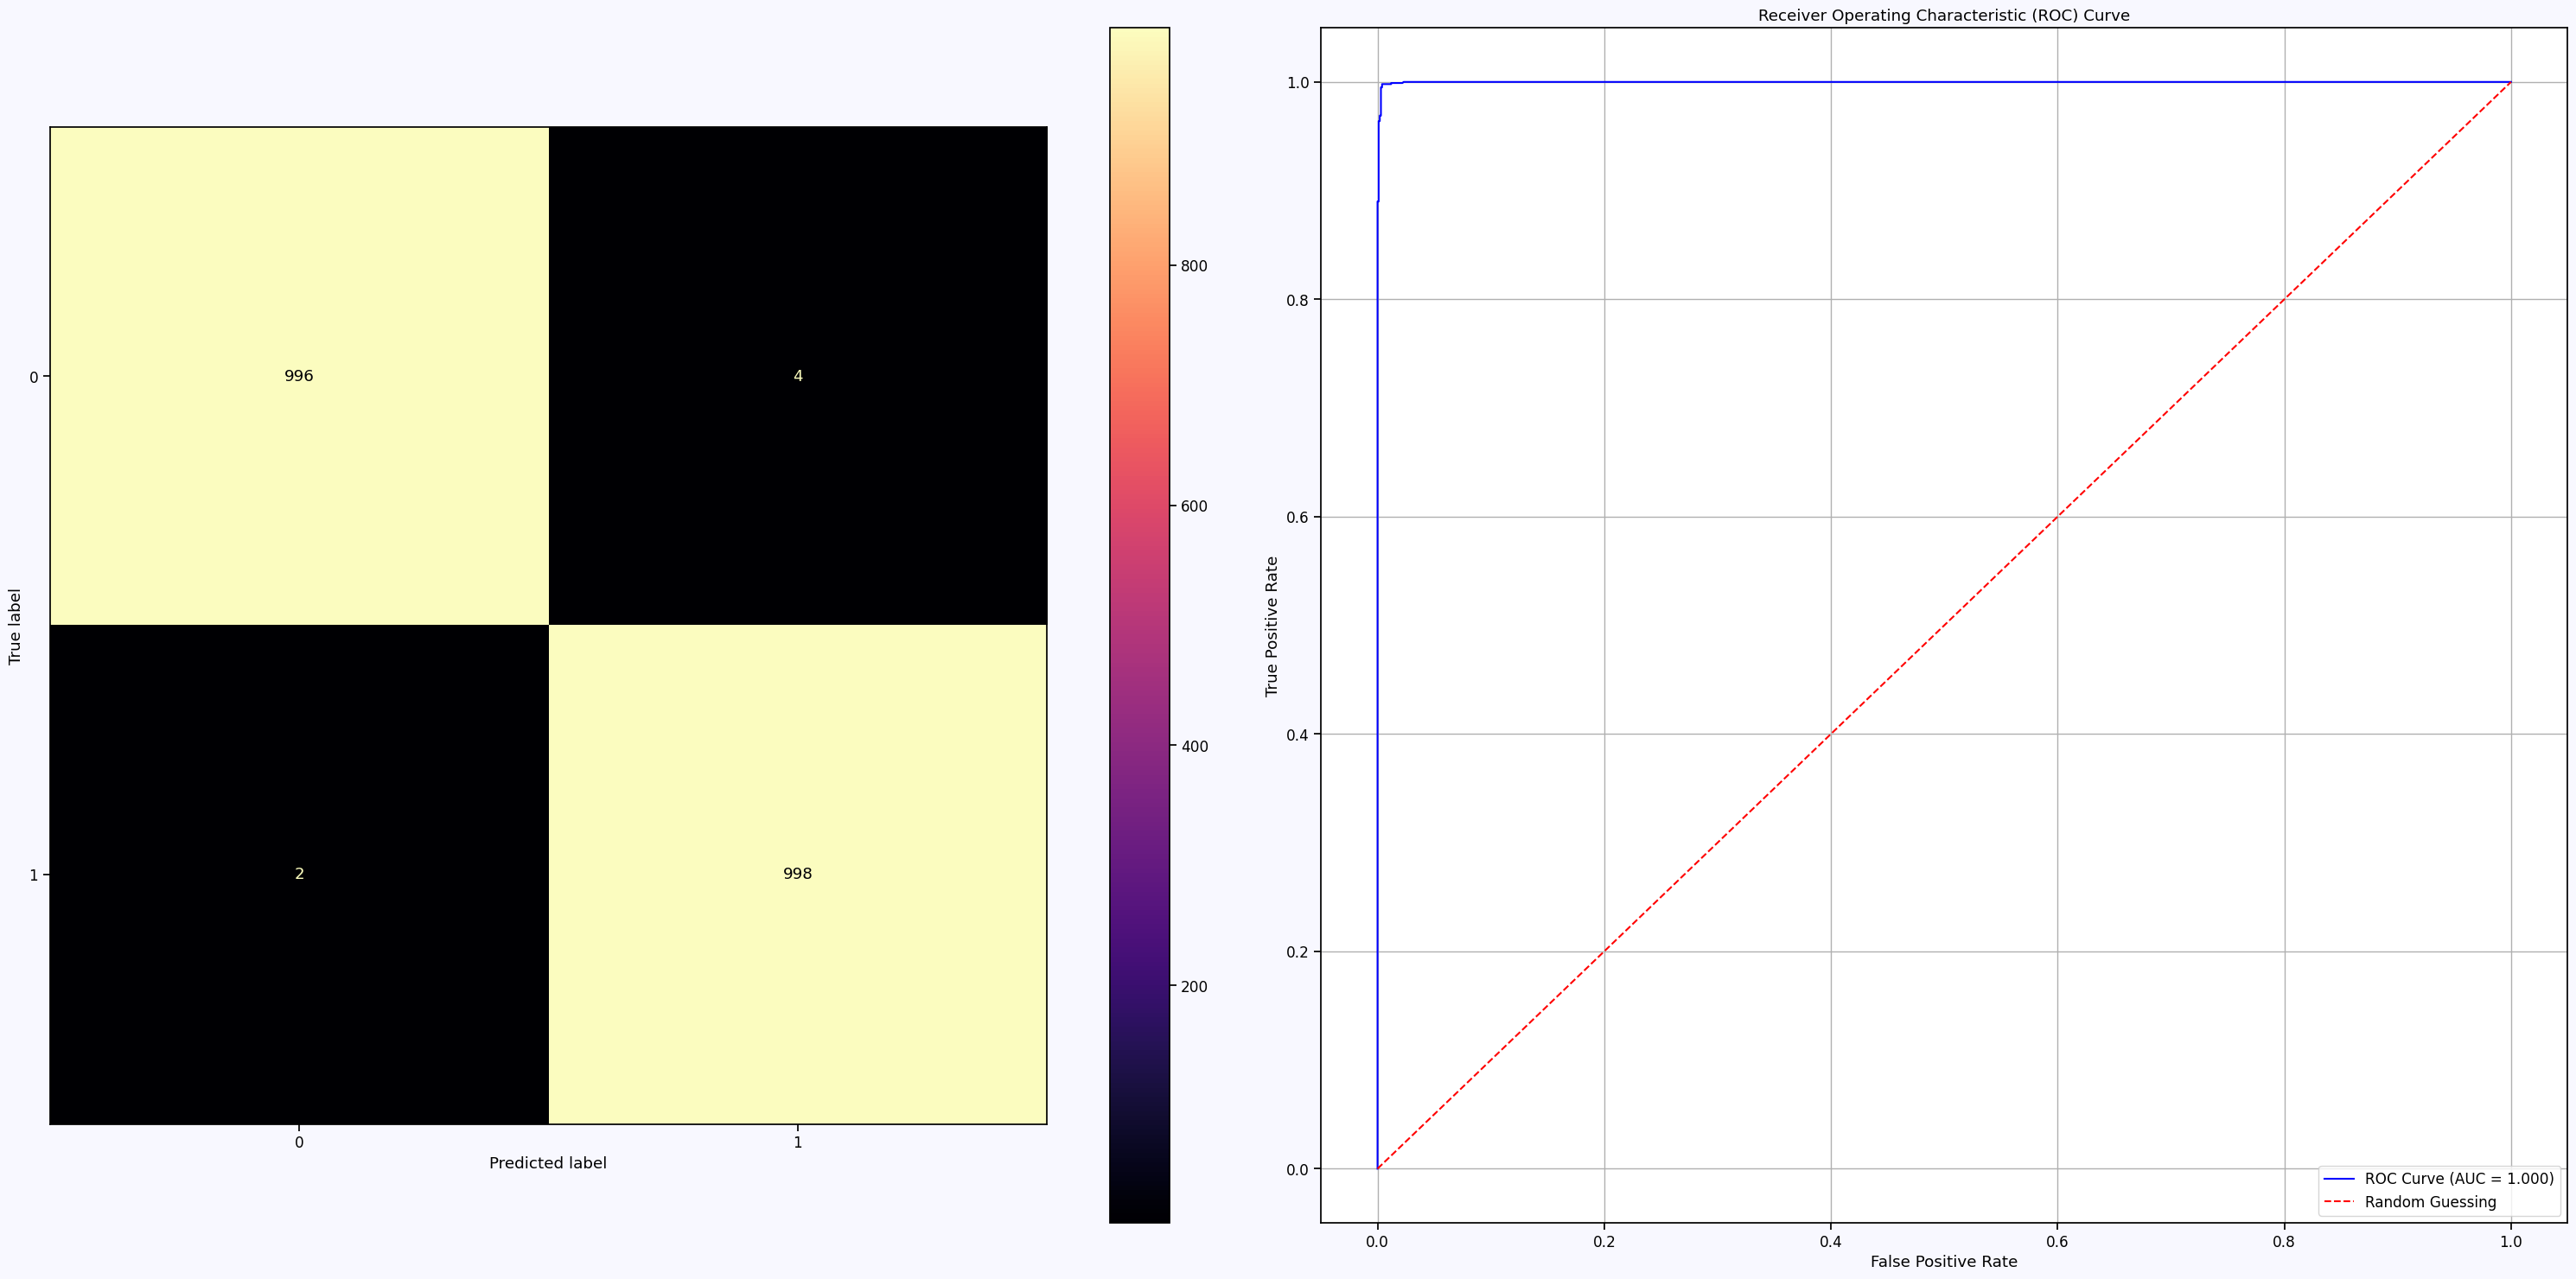

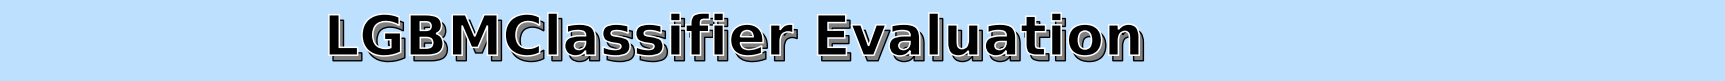

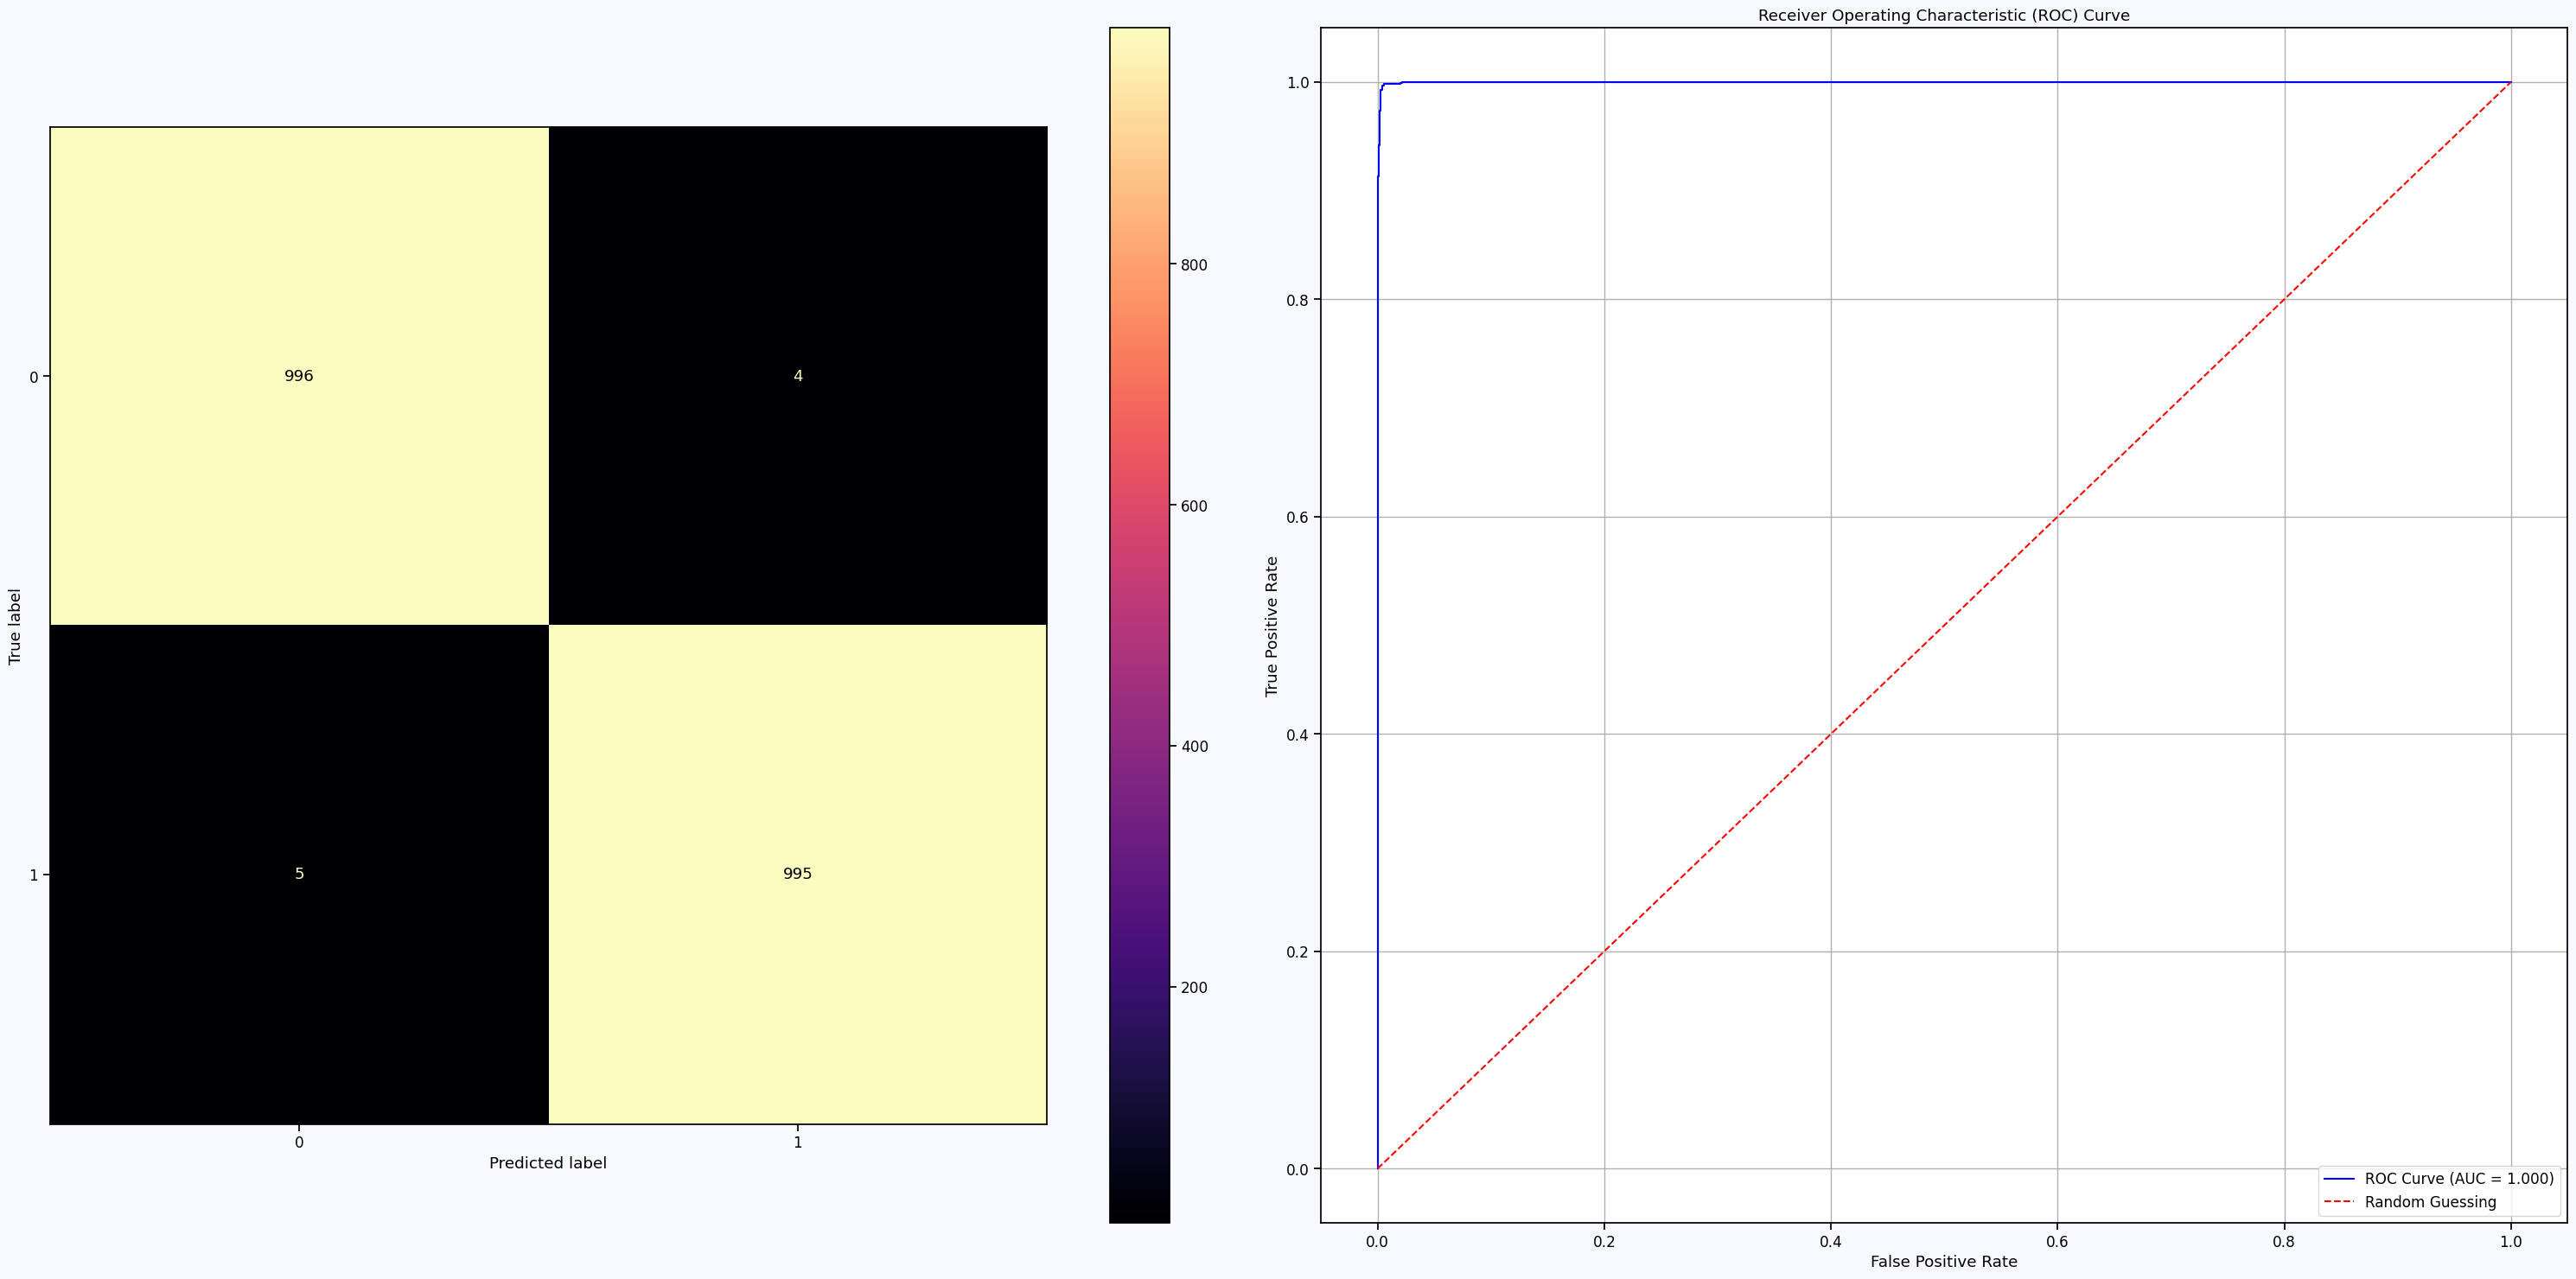

In [52]:
from sklearn.metrics import ConfusionMatrixDisplay,confusion_matrix
for i in range(len(list(model_dict))):
    
    label_txt(f'   {list(model_dict)[i]} Evaluation',w = 0.15)

    fig, axes = plt.subplots(1, 2, figsize = (30, 15),dpi = 100)
    
    sns.set_context('notebook',font_scale= 1.1)
    plt.rcParams['figure.facecolor'] = 'ghostwhite'
    plt.rcParams['axes.facecolor'] = 'white'
    g = ConfusionMatrixDisplay(confusion_matrix(y_test,model_ypred[i])).plot(cmap='magma',ax = axes[0])

    fpr, tpr, thresholds = roc_curve(y_test,model_ypred_prop[i])
    auc_score = roc_auc_score(y_test,model_ypred_prop[i])


    axes[1].plot(fpr, tpr, label=f'ROC Curve (AUC = {auc_score:.3f})', color='b')
    axes[1].plot([0, 1], [0, 1], '--', color='red', label='Random Guessing')

    axes[1].set_xlabel('False Positive Rate')
    axes[1].set_ylabel('True Positive Rate')

    axes[1].set_title('Receiver Operating Characteristic (ROC) Curve')
    axes[1].legend(loc='lower right')
    axes[1].grid(True)
    axes[1].patch.set_linewidth(10)
    if list(model_dict)[i] in ['BaggingClassifier','LogisticRegression','HistGradientBoostingClassifier']:
        continue
        
        


    plt.tight_layout()

In [53]:
from sklearn.pipeline import Pipeline

from sklearn.pipeline import Pipeline


pre_processing_pipline = Pipeline([

    ('clean_tweets',ProcessTweets()),
    ('clean_freqs', BuildFreqs())

])


pre_processing_pipline_new_data = Pipeline([

    ('clean_tweets',ProcessTweets()),
    ('feature_extract' , ExtractFeatuers()),
    
])



In [54]:
cleaned_freq = pre_processing_pipline.fit_transform(dict_tweets["all_tweets"],labels)
cleaned_freq

{('followfriday', 1.0): 25,
 ('top', 1.0): 32,
 ('engag', 1.0): 7,
 ('member', 1.0): 16,
 ('commun', 1.0): 33,
 ('week', 1.0): 83,
 (':)', 1.0): 3568,
 ('hey', 1.0): 76,
 ('jame', 1.0): 7,
 ('odd', 1.0): 2,
 (':/', 1.0): 5,
 ('pleas', 1.0): 97,
 ('call', 1.0): 37,
 ('contact', 1.0): 7,
 ('centr', 1.0): 2,
 ('02392441234', 1.0): 1,
 ('abl', 1.0): 8,
 ('assist', 1.0): 1,
 ('mani', 1.0): 33,
 ('thank', 1.0): 620,
 ('listen', 1.0): 16,
 ('last', 1.0): 47,
 ('night', 1.0): 68,
 ('bleed', 1.0): 2,
 ('amaz', 1.0): 51,
 ('track', 1.0): 5,
 ('scotland', 1.0): 2,
 ('congrat', 1.0): 21,
 ('yeaaah', 1.0): 1,
 ('yipppi', 1.0): 1,
 ('accnt', 1.0): 2,
 ('verifi', 1.0): 2,
 ('rqst', 1.0): 1,
 ('succeed', 1.0): 1,
 ('got', 1.0): 69,
 ('blue', 1.0): 9,
 ('tick', 1.0): 1,
 ('mark', 1.0): 1,
 ('fb', 1.0): 6,
 ('profil', 1.0): 2,
 ('15', 1.0): 5,
 ('day', 1.0): 246,
 ('one', 1.0): 129,
 ('irresist', 1.0): 2,
 ('flipkartfashionfriday', 1.0): 17,
 ('like', 1.0): 233,
 ('keep', 1.0): 68,
 ('love', 1.0): 400,


In [55]:
cleaned_featuers = pre_processing_pipline_new_data.fit_transform(dict_tweets["all_tweets"],cleaned_freq)
cleaned_featuers

[array([1.000e+00, 3.764e+03, 7.200e+01]),
 array([1.000e+00, 4.464e+03, 5.170e+02]),
 array([1.000e+00, 3.759e+03, 1.600e+02]),
 array([1.000e+00, 3.589e+03, 4.000e+00]),
 array([1.000e+00, 3.915e+03, 2.800e+02]),
 array([1.000e+00, 3.716e+03, 1.500e+02]),
 array([1.000e+00, 4.923e+03, 6.460e+02]),
 array([1.000e+00, 3.965e+03, 3.550e+02]),
 array([  1., 789., 234.]),
 array([  1., 343., 133.]),
 array([1.000e+00, 3.759e+03, 6.700e+01]),
 array([1.000e+00, 4.594e+03, 8.450e+02]),
 array([  1., 381., 262.]),
 array([1.000e+00, 3.852e+03, 2.450e+02]),
 array([1.000e+00, 4.137e+03, 3.360e+02]),
 array([1.000e+00, 1.264e+03, 2.910e+02]),
 array([1.00e+00, 3.87e+03, 3.45e+02]),
 array([1.000e+00, 1.437e+03, 3.030e+02]),
 array([1.000e+00, 3.743e+03, 3.600e+01]),
 array([1.000e+00, 4.349e+03, 6.740e+02]),
 array([1.000e+00, 4.265e+03, 3.790e+02]),
 array([1.000e+00, 3.712e+03, 1.470e+02]),
 array([1.000e+00, 3.791e+03, 1.560e+02]),
 array([1.000e+00, 4.297e+03, 5.230e+02]),
 array([1.000e+0

In [56]:
RF = RandomForestClassifier()
RF.fit(X,y)

RandomForestClassifier()

In [57]:
import pickle

# save the iris classification model as a pickle file
model_pkl_file = "RF_model.pkl"  

with open(model_pkl_file, 'wb') as file:  
    pickle.dump(RF, file)


with open(model_pkl_file, 'rb') as file:  
    model = pickle.load(file)

model

RandomForestClassifier()

In [58]:
model

RandomForestClassifier()

In [59]:
data_str_keys = {str(key): value for key, value in cleaned_freq.items()}
data_str_keys

{"('followfriday', 1.0)": 25,
 "('top', 1.0)": 32,
 "('engag', 1.0)": 7,
 "('member', 1.0)": 16,
 "('commun', 1.0)": 33,
 "('week', 1.0)": 83,
 "(':)', 1.0)": 3568,
 "('hey', 1.0)": 76,
 "('jame', 1.0)": 7,
 "('odd', 1.0)": 2,
 "(':/', 1.0)": 5,
 "('pleas', 1.0)": 97,
 "('call', 1.0)": 37,
 "('contact', 1.0)": 7,
 "('centr', 1.0)": 2,
 "('02392441234', 1.0)": 1,
 "('abl', 1.0)": 8,
 "('assist', 1.0)": 1,
 "('mani', 1.0)": 33,
 "('thank', 1.0)": 620,
 "('listen', 1.0)": 16,
 "('last', 1.0)": 47,
 "('night', 1.0)": 68,
 "('bleed', 1.0)": 2,
 "('amaz', 1.0)": 51,
 "('track', 1.0)": 5,
 "('scotland', 1.0)": 2,
 "('congrat', 1.0)": 21,
 "('yeaaah', 1.0)": 1,
 "('yipppi', 1.0)": 1,
 "('accnt', 1.0)": 2,
 "('verifi', 1.0)": 2,
 "('rqst', 1.0)": 1,
 "('succeed', 1.0)": 1,
 "('got', 1.0)": 69,
 "('blue', 1.0)": 9,
 "('tick', 1.0)": 1,
 "('mark', 1.0)": 1,
 "('fb', 1.0)": 6,
 "('profil', 1.0)": 2,
 "('15', 1.0)": 5,
 "('day', 1.0)": 246,
 "('one', 1.0)": 129,
 "('irresist', 1.0)": 2,
 "('flipkar

In [60]:
import os

# Get the current working directory
folder_path = os.getcwd()
folder_path

'c:\\Users\\omaro\\OneDrive\\Desktop\\Project\\Instagram_Post_scraper\\API'

In [61]:
import json
import ast

freqs_json_file = "freqs.json"

with open(freqs_json_file, "w") as json_file:
    json.dump(data_str_keys, json_file)


with open(freqs_json_file, "r") as json_file:
    loaded_data = json.load(json_file)

loaded_data_tuples = {ast.literal_eval(key): value for key, value in loaded_data.items()}

print(loaded_data_tuples)  # Output the loaded dictionary with tuple keys

{('followfriday', 1.0): 25, ('top', 1.0): 32, ('engag', 1.0): 7, ('member', 1.0): 16, ('commun', 1.0): 33, ('week', 1.0): 83, (':)', 1.0): 3568, ('hey', 1.0): 76, ('jame', 1.0): 7, ('odd', 1.0): 2, (':/', 1.0): 5, ('pleas', 1.0): 97, ('call', 1.0): 37, ('contact', 1.0): 7, ('centr', 1.0): 2, ('02392441234', 1.0): 1, ('abl', 1.0): 8, ('assist', 1.0): 1, ('mani', 1.0): 33, ('thank', 1.0): 620, ('listen', 1.0): 16, ('last', 1.0): 47, ('night', 1.0): 68, ('bleed', 1.0): 2, ('amaz', 1.0): 51, ('track', 1.0): 5, ('scotland', 1.0): 2, ('congrat', 1.0): 21, ('yeaaah', 1.0): 1, ('yipppi', 1.0): 1, ('accnt', 1.0): 2, ('verifi', 1.0): 2, ('rqst', 1.0): 1, ('succeed', 1.0): 1, ('got', 1.0): 69, ('blue', 1.0): 9, ('tick', 1.0): 1, ('mark', 1.0): 1, ('fb', 1.0): 6, ('profil', 1.0): 2, ('15', 1.0): 5, ('day', 1.0): 246, ('one', 1.0): 129, ('irresist', 1.0): 2, ('flipkartfashionfriday', 1.0): 17, ('like', 1.0): 233, ('keep', 1.0): 68, ('love', 1.0): 400, ('custom', 1.0): 4, ('wait', 1.0): 70, ('long',

In [62]:
cleaned_freq

{('followfriday', 1.0): 25,
 ('top', 1.0): 32,
 ('engag', 1.0): 7,
 ('member', 1.0): 16,
 ('commun', 1.0): 33,
 ('week', 1.0): 83,
 (':)', 1.0): 3568,
 ('hey', 1.0): 76,
 ('jame', 1.0): 7,
 ('odd', 1.0): 2,
 (':/', 1.0): 5,
 ('pleas', 1.0): 97,
 ('call', 1.0): 37,
 ('contact', 1.0): 7,
 ('centr', 1.0): 2,
 ('02392441234', 1.0): 1,
 ('abl', 1.0): 8,
 ('assist', 1.0): 1,
 ('mani', 1.0): 33,
 ('thank', 1.0): 620,
 ('listen', 1.0): 16,
 ('last', 1.0): 47,
 ('night', 1.0): 68,
 ('bleed', 1.0): 2,
 ('amaz', 1.0): 51,
 ('track', 1.0): 5,
 ('scotland', 1.0): 2,
 ('congrat', 1.0): 21,
 ('yeaaah', 1.0): 1,
 ('yipppi', 1.0): 1,
 ('accnt', 1.0): 2,
 ('verifi', 1.0): 2,
 ('rqst', 1.0): 1,
 ('succeed', 1.0): 1,
 ('got', 1.0): 69,
 ('blue', 1.0): 9,
 ('tick', 1.0): 1,
 ('mark', 1.0): 1,
 ('fb', 1.0): 6,
 ('profil', 1.0): 2,
 ('15', 1.0): 5,
 ('day', 1.0): 246,
 ('one', 1.0): 129,
 ('irresist', 1.0): 2,
 ('flipkartfashionfriday', 1.0): 17,
 ('like', 1.0): 233,
 ('keep', 1.0): 68,
 ('love', 1.0): 400,


In [63]:
from main import Predict_tweet


Predict_tweet(dict_tweets["all_tweets"])

['#FollowFriday @France_Inte @PKuchly57 @Milipol_Paris for being top engaged members in my community this week :)', '@Lamb2ja Hey James! How odd :/ Please call our Contact Centre on 02392441234 and we will be able to assist you :) Many thanks!', '@DespiteOfficial we had a listen last night :) As You Bleed is an amazing track. When are you in Scotland?!', '@97sides CONGRATS :)', 'yeaaaah yippppy!!!  my accnt verified rqst has succeed got a blue tick mark on my fb profile :) in 15 days', '@BhaktisBanter @PallaviRuhail This one is irresistible :)\n#FlipkartFashionFriday http://t.co/EbZ0L2VENM', "We don't like to keep our lovely customers waiting for long! We hope you enjoy! Happy Friday! - LWWF :) https://t.co/smyYriipxI", '@Impatientraider On second thought, there’s just not enough time for a DD :) But new shorts entering system. Sheep must be buying.', 'Jgh , but we have to go to Bayan :D bye', 'As an act of mischievousness, am calling the ETL layer of our in-house warehousing app Katam

array([1., 1., 1., ..., 0., 0., 0.])

In [64]:
from main import Predict_tweet


Predict_tweet(dict_tweets["all_tweets"])

['#FollowFriday @France_Inte @PKuchly57 @Milipol_Paris for being top engaged members in my community this week :)', '@Lamb2ja Hey James! How odd :/ Please call our Contact Centre on 02392441234 and we will be able to assist you :) Many thanks!', '@DespiteOfficial we had a listen last night :) As You Bleed is an amazing track. When are you in Scotland?!', '@97sides CONGRATS :)', 'yeaaaah yippppy!!!  my accnt verified rqst has succeed got a blue tick mark on my fb profile :) in 15 days', '@BhaktisBanter @PallaviRuhail This one is irresistible :)\n#FlipkartFashionFriday http://t.co/EbZ0L2VENM', "We don't like to keep our lovely customers waiting for long! We hope you enjoy! Happy Friday! - LWWF :) https://t.co/smyYriipxI", '@Impatientraider On second thought, there’s just not enough time for a DD :) But new shorts entering system. Sheep must be buying.', 'Jgh , but we have to go to Bayan :D bye', 'As an act of mischievousness, am calling the ETL layer of our in-house warehousing app Katam

array([1., 1., 1., ..., 0., 0., 0.])

In [65]:

from sklearn.base import TransformerMixin, BaseEstimator

class ProcessTweets(BaseEstimator,TransformerMixin):

    def __init__(self):
        self.string = string
        self.processed_tweets = None
        self.ready_tweets = None


    def fit(self,X,y = None):
        self.proccesed_tweets = X


    
    def transform(self, X):

        under_tweets = X
        
        if type(under_tweets) == str:

            under_tweets = [under_tweets]




        """Process tweet function.
        Input:
            tweet: a string containing a tweet
        Output:
            tweets_clean: a list of words containing the processed tweet

        """
        stemmer = PorterStemmer()
        stopwords_english = stopwords.words('english')





        sub_tweets = []
        for tweet in under_tweets:
            # remove stock market tickers like $GE
            tweet = re.sub(r'\$\w*', '', tweet)
            # remove old style retweet text "RT"
            tweet = re.sub(r'^RT[\s]+', '', tweet)
            # remove hyperlinks
            tweet = re.sub(r'https?:\/\/.*[\r\n]*', '', tweet)
            # remove hashtags
            # only removing the hash # sign from the word
            tweet = re.sub(r'#', '', tweet)

            sub_tweets.append(tweet)


            

        # tokenize tweets
        tokenizer = TweetTokenizer(preserve_case=False, strip_handles=True,
                                reduce_len=True)
        

        tokenize_tweets = []
        for tweet in sub_tweets:
            tokenize_tweets.append(tokenizer.tokenize(tweet)) 


        clean_tweets = []

        for single_tweet in tokenize_tweets:
            tweet_clean = []
            for word in single_tweet:


                if (word not in stopwords_english and  # remove stopwords
                        word not in string.punctuation):  # remove punctuation
                    
                    # tweets_clean.append(word)
                    stem_word = stemmer.stem(word)  # stemming word
                    tweet_clean.append(stem_word)

            clean_tweets.append(" ".join(tweet_clean))


        if self.ready_tweets == None:
            self.ready_tweets = clean_tweets


        return  clean_tweets
    


    
    def fit_transform(self,X,y=None):
        self.fit(X,y)

        return self.transform(X)










class BuildFreqs(BaseEstimator,TransformerMixin):
    def __init__(self):
        self.tweets = None
        self.labels = None
        self.freqs = None
        

    def fit(self,X,y = None):

        self.tweets = X
        self.labels = y

        

    def transform(self,X):


        tweets = X
        ys = self.labels
        

        if type(tweets) == str:

            under_tweets = [under_tweets]

        """Build frequencies.
        Input:
            tweets: a list of tweets
            ys: an m x 1 array with the sentiment label of each tweet
                (either 0 or 1)
        Output:
            freqs: a dictionary mapping each (word, sentiment) pair to its
            frequency
        """
        # Convert np array to list since zip needs an iterable.
        # The squeeze is necessary or the list ends up with one element.
        # Also note that this is just a NOP if ys is already a list.
        yslist = np.squeeze(ys).tolist()

        # Start with an empty dictionary and populate it by looping over all tweets
        # and over all processed words in each tweet.
        freqs = {}
        for y, tweet in zip(yslist, tweets):
            for word in tweet.split(" "):
                pair = (word, y)
                if pair in freqs:
                    freqs[pair] += 1
                else:
                    freqs[pair] = 1


        if self.freqs == None:
            self.freqs = freqs


        return freqs
    


    def fit_transform(self,X,y = None):
        self.fit(X,y)

        return self.transform(X)
        



class ExtractFeatuers(BaseEstimator,TransformerMixin):
    def __init__(self):
        self.tweets = None
        self.freqs = None
        self.extracted_featuers = None

    def fit(self,X,y = None):

        self.tweets = X
        self.freqs = y

    def transform(self,X):
        cleaned_tweets = X

        freqs = self.freqs

        if type(cleaned_tweets) == str:
            cleaned_tweets = [cleaned_tweets]


        '''
        Input: 
            tweet: a list of words for one tweet
            freqs: a dictionary corresponding to the frequencies of each tuple (word, label)
        Output: 
            x: a feature vector of dimension (1,3)
        '''
        # process_tweet tokenizes, stems, and removes stopwords
        list_of_extract_featuers = []


        for single_tweet in cleaned_tweets:
            x = np.zeros((1, 3)) 
            
            #bias term is set to 1
            x[0,0] = 1

            for word in single_tweet.split():

                
                        
                # increment the word count for the positive label 1
                x[0,1] += freqs.get((word, 1.0),0)
                
                # increment the word count for the negative label 0
                x[0,2] += freqs.get((word, 0.0),0)

                

            list_of_extract_featuers.append(x.flatten())

        if self.extracted_featuers == None:
            self.extracted_featuers = list_of_extract_featuers
            
        return list_of_extract_featuers
        

    def fit_transform(self,X,y = None):
        self.fit(X,y)

        return self.transform(X)
        

In [66]:
from main import Predict_tweet

Predict_tweet('bad')

['bad']


array([0.])

In [67]:
import pathlib
pathlib.Path(__file__).parent.resolve()

NameError: name '__file__' is not defined

In [ ]:
import pathlib
pathlib.Path().resolve()

WindowsPath('C:/Users/omaro/OneDrive/Desktop/Courses/NLP Spec/Final/NLP_SPEC2/projects')

In [ ]:
str(pathlib.Path().resolve()) + "\\"

'C:\\Users\\omaro\\OneDrive\\Desktop\\Courses\\NLP Spec\\Final\\NLP_SPEC2\\projects\\'